# 선형 회귀 모델 (Linear Regression Model)

## 학습 목표
1. **선형 회귀(Linear Regression)**의 기본 개념과 원리를 이해할 수 있다
2. **최소제곱법(OLS)**을 이용한 회귀 분석을 수행할 수 있다
3. **다중 선형 회귀(Multiple Linear Regression)**를 구현할 수 있다
4. **정규화 기법(Ridge, Lasso, ElasticNet)**을 이해하고 적용할 수 있다
5. 회귀 모델의 **평가 지표**(MSE, RMSE, R², MAE)를 해석할 수 있다

## 주요 내용
- 단순 선형 회귀 vs 다중 선형 회귀
- LinearRegression 모델 학습
- Ridge Regression (L2 정규화)
- Lasso Regression (L1 정규화)
- ElasticNet (L1 + L2 정규화)
- 회귀 평가 지표 (MSE, RMSE, R², MAE)
- 잔차 분석

## 회귀 (regression) 예측 (보스턴 집값 예측)

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [2]:
# load_boston은 sklearn 1.2+에서 제거됨 → California Housing 사용
from sklearn.datasets import fetch_california_housing

In [3]:
!pip list

Package                   Version
------------------------- -----------
alembic                   1.18.0
asttokens                 3.0.1
attrs                     25.4.0
colorama                  0.4.6
colorlog                  6.10.1
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.19
decorator                 5.2.1
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.61.1
graphviz                  0.21
greenlet                  3.3.0
ipykernel                 7.1.0
ipython                   9.9.0
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
joblib                    1.5.3
jsonschema                4.26.0
jsonschema-specifications 2025.9.1
jupyter_client            8.8.0
jupyter_core              5.9.1
kiwisolver                1.4.9
lightgbm                  4.6.0
Mako                      1.3.10
MarkupSafe                3.0.3
matplotlib          

데이터 로드

In [4]:
data = fetch_california_housing()

In [5]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [6]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [7]:
# California Housing의 타겟 컬럼명
df['MedHouseVal'] = data['target']

In [8]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

**컬럼 소개 (California Housing Dataset)**

속성 수 : 8

* **MedInc**: 블록 그룹의 중간 소득
* **HouseAge**: 블록 그룹의 중간 주택 연령
* **AveRooms**: 가구당 평균 방 수
* **AveBedrms**: 가구당 평균 침실 수
* **Population**: 블록 그룹 인구
* **AveOccup**: 가구당 평균 거주자 수
* **Latitude**: 블록 그룹 위도
* **Longitude**: 블록 그룹 경도
* **MedHouseVal**: 중간 주택 가격 (타겟, $100,000 단위)

train / test 데이터를 분할 합니다.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'])

In [11]:
x_train.shape, x_test.shape

((15480, 8), (5160, 8))

In [12]:
x_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
11243  4.3636      33.0  5.510204   1.014842      1869.0  3.467532     33.81   
10837  7.4056      26.0  8.044231   1.036538      1504.0  2.892308     33.68   
17435  2.3804      37.0  6.238971   1.227941       740.0  2.720588     34.64   
19465  3.0720      15.0  5.977941   1.236765      1986.0  2.920588     37.69   
11112  2.8021      33.0  4.794562   1.129909      1159.0  3.501511     33.84   

       Longitude  
11243    -118.00  
10837    -117.94  
17435    -120.46  
19465    -120.97  
11112    -117.89

In [13]:
y_train.head()

11243    2.018
10837    3.742
17435    1.480
19465    1.143
11112    1.951
Name: MedHouseVal, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [14]:
import numpy as np

In [15]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [16]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [17]:
my_mse(pred, actual)

np.float64(4.0)

In [18]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [19]:
my_mae(pred, actual)

np.float64(2.0)

In [20]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [21]:
my_rmse(pred, actual)

np.float64(2.0)

### sklearn의 평가지표 활용하기

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(np.float64(2.0), 2.0)

In [24]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(np.float64(4.0), 4.0)

### 모델별 성능 확인을 위한 함수

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [26]:
from sklearn.linear_model import LinearRegression

##### **일반 형태**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8$$

#### **California Housing 데이터셋 적용**

$$\text{MedHouseVal} = \beta_0 + \beta_1 \cdot \text{MedInc} + \beta_2 \cdot \text{HouseAge} + \beta_3 \cdot \text{AveRooms} + \beta_4 \cdot \text{AveBedrms} + \beta_5 \cdot \text{Population} + \beta_6 \cdot \text{AveOccup} + \beta_7 \cdot \text{Latitude} + \beta_8 \cdot \text{Longitude}$$

**변수 설명**

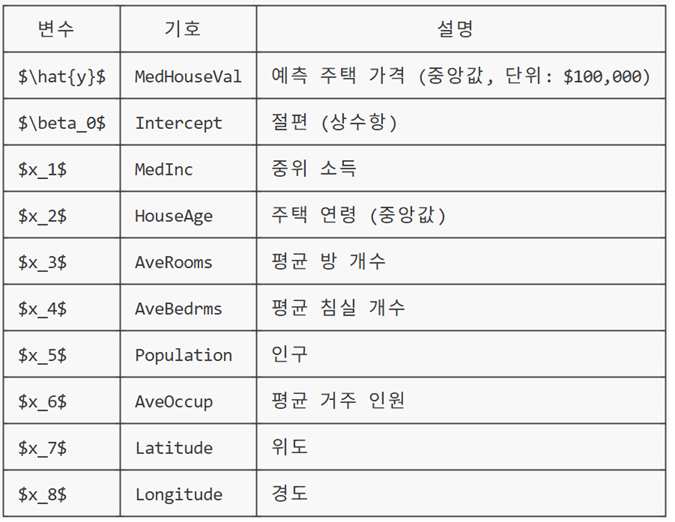

In [27]:
# n_jobs=-1이면 사용할 수 있는 CPU 다 활용
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [28]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
pred = model.predict(x_test)

### Multi-variable Linear Regression and Matrix dimension
 **Hypothesis(가설)**   
 h(theta) = regression line to predict future values
 <br> theta = parameters </br>
 <br> </br>
<br> $$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 CRIM + \theta_2 ZN + \theta_3 INDUS + \theta_4 CHAS + \theta_5 NOX + \theta_6 RM + ... }$$ </br>

In [30]:
# theta_0 => intercept_
# theta_1, theta_2 ... theta_n => coef_

print(model.coef_)
print(model.intercept_)

[ 0.43657876  0.00940921 -0.10365463  0.6283138  -0.00000548 -0.00392705
 -0.42138305 -0.43410703]
-36.888007404666155


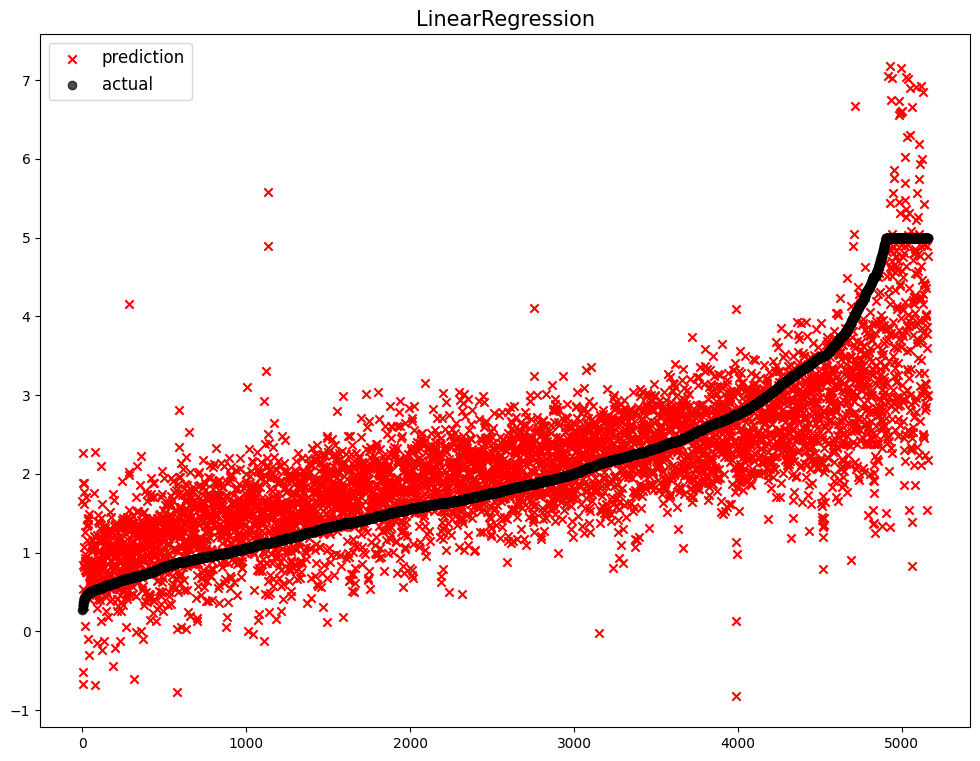

              model       mse
0  LinearRegression  0.528807


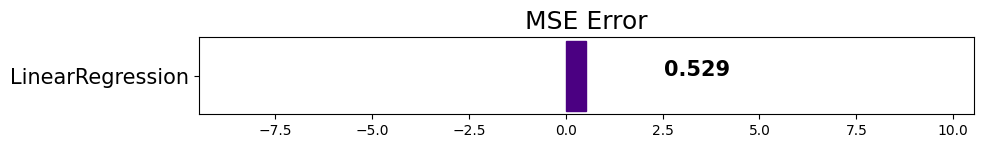

In [31]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [32]:
from sklearn.linear_model import Ridge

In [33]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

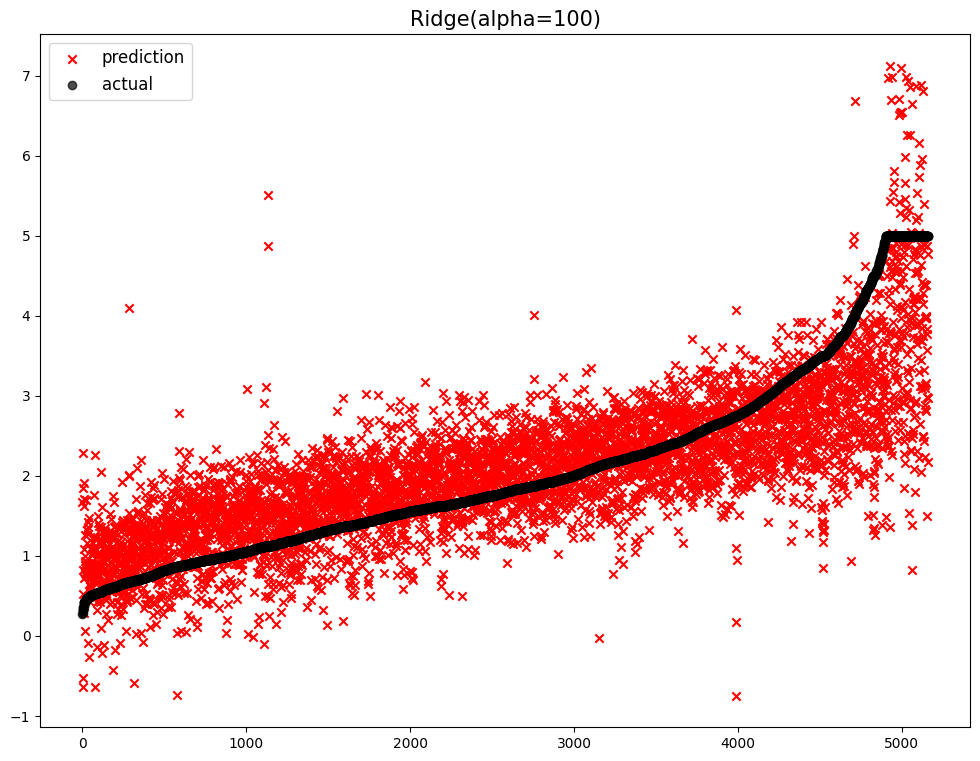

              model       mse
0  Ridge(alpha=100)  0.529615
1  LinearRegression  0.528807


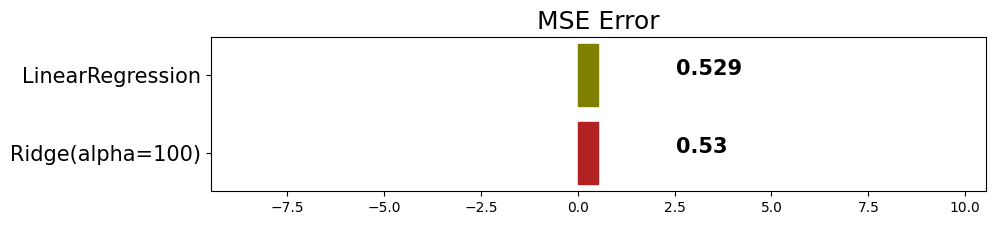

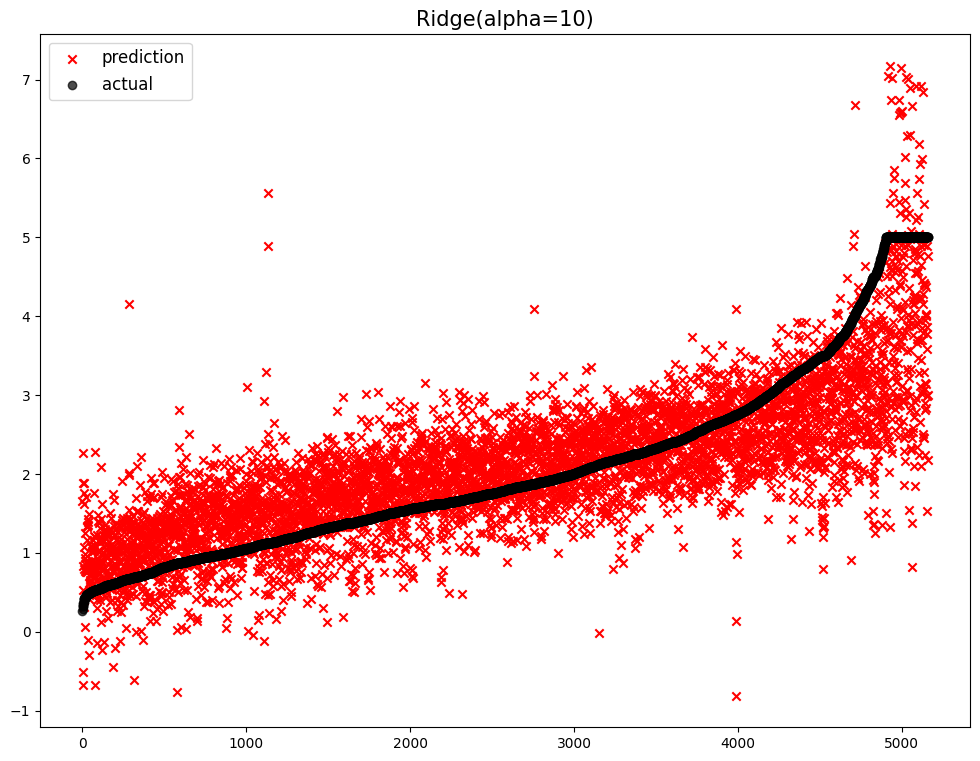

              model       mse
0  Ridge(alpha=100)  0.529615
1   Ridge(alpha=10)  0.528865
2  LinearRegression  0.528807


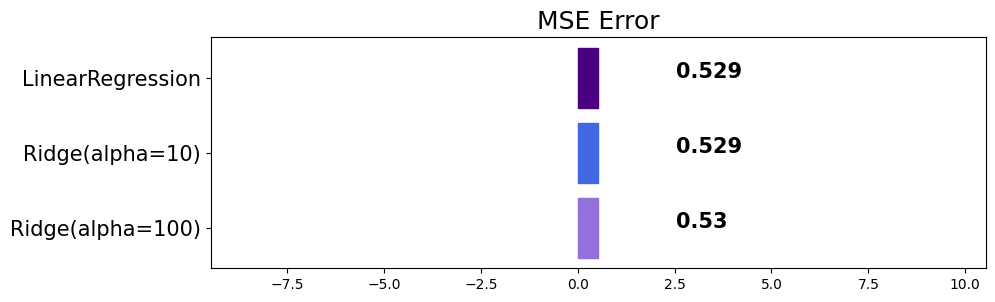

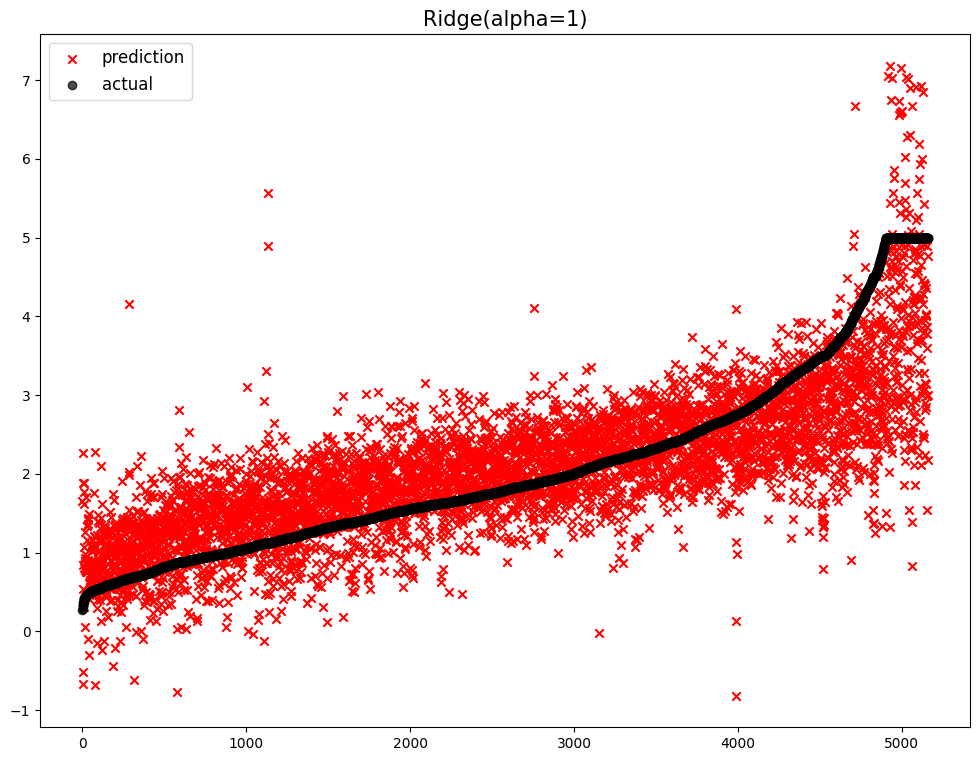

              model       mse
0  Ridge(alpha=100)  0.529615
1   Ridge(alpha=10)  0.528865
2    Ridge(alpha=1)  0.528812
3  LinearRegression  0.528807


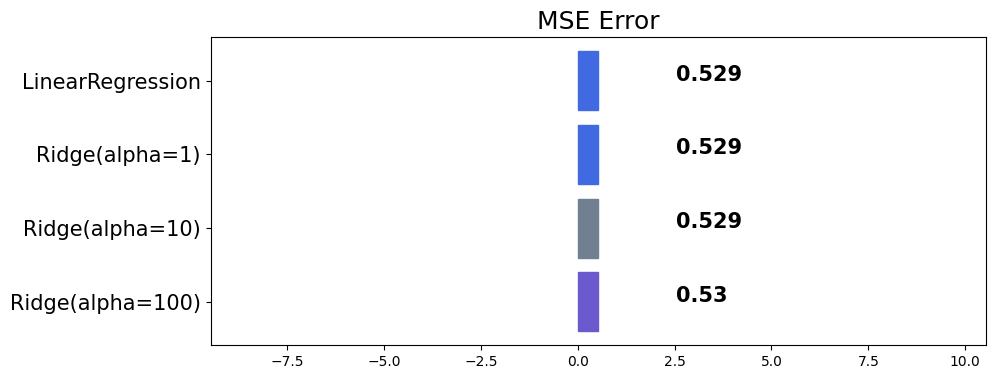

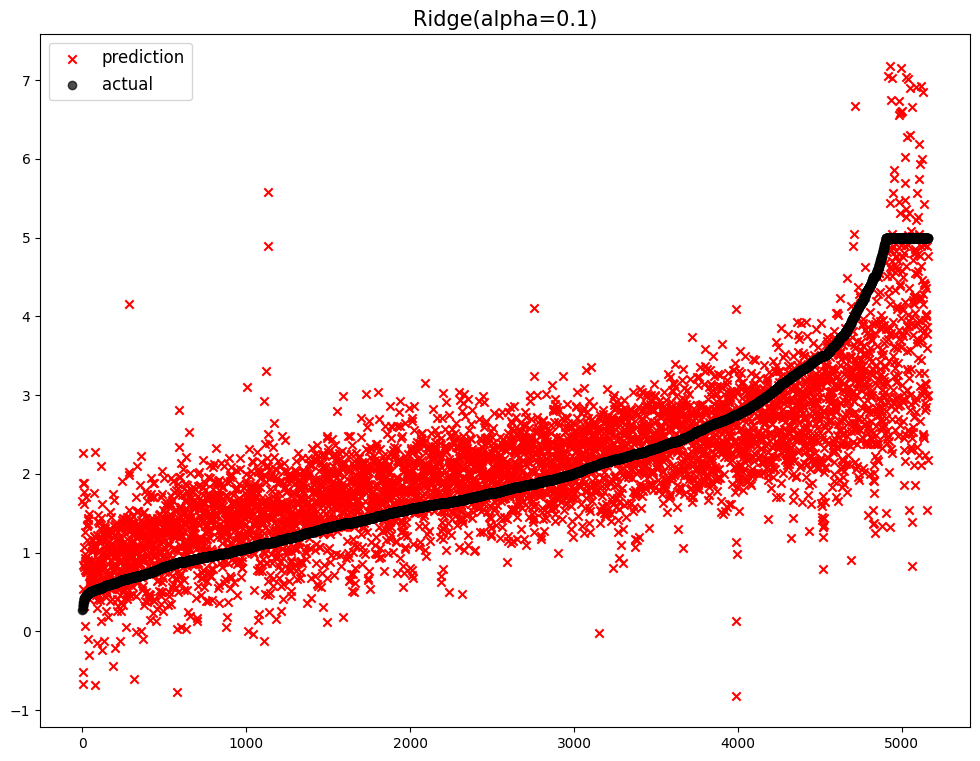

              model       mse
0  Ridge(alpha=100)  0.529615
1   Ridge(alpha=10)  0.528865
2    Ridge(alpha=1)  0.528812
3  Ridge(alpha=0.1)  0.528807
4  LinearRegression  0.528807


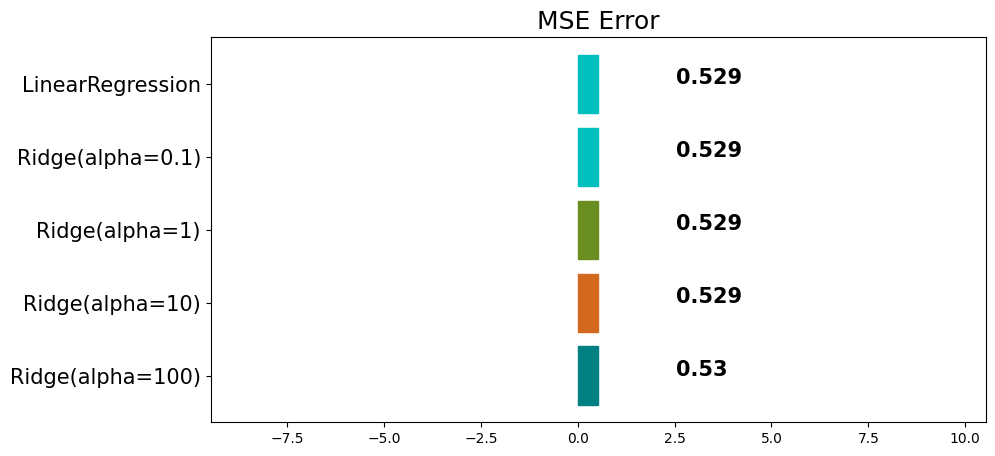

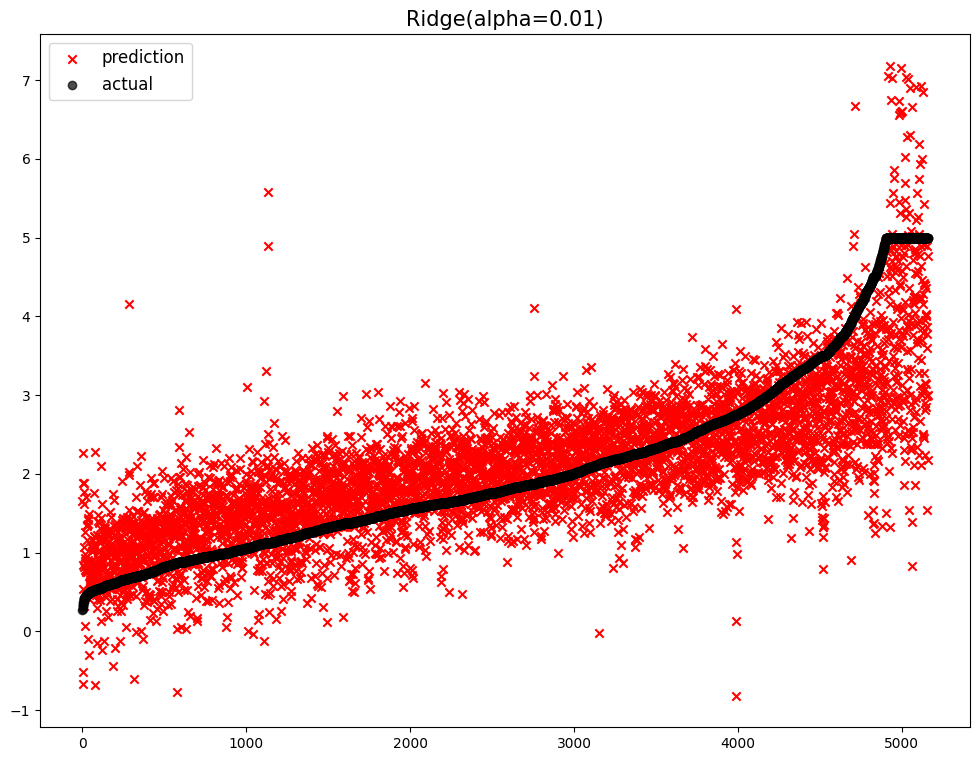

               model       mse
0   Ridge(alpha=100)  0.529615
1    Ridge(alpha=10)  0.528865
2     Ridge(alpha=1)  0.528812
3   Ridge(alpha=0.1)  0.528807
4  Ridge(alpha=0.01)  0.528807
5   LinearRegression  0.528807


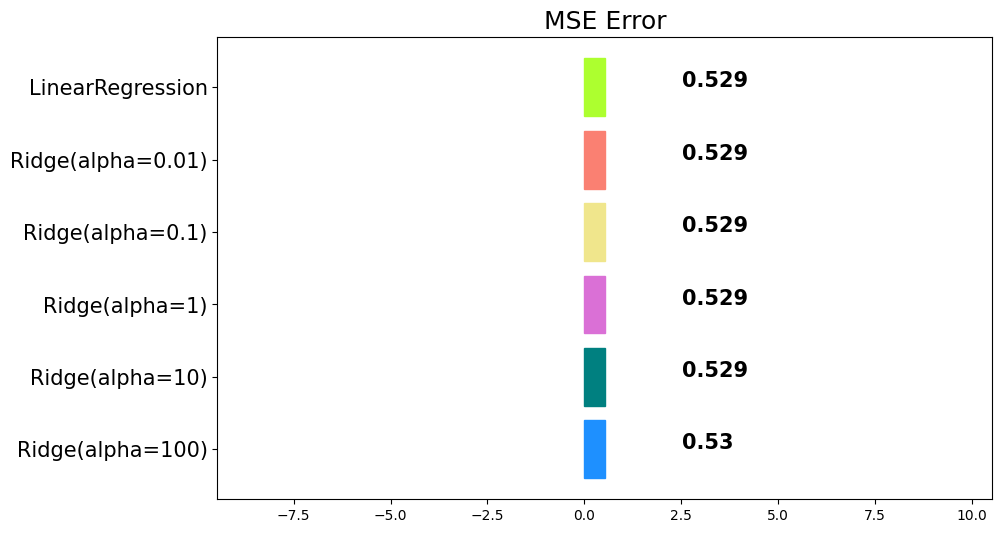

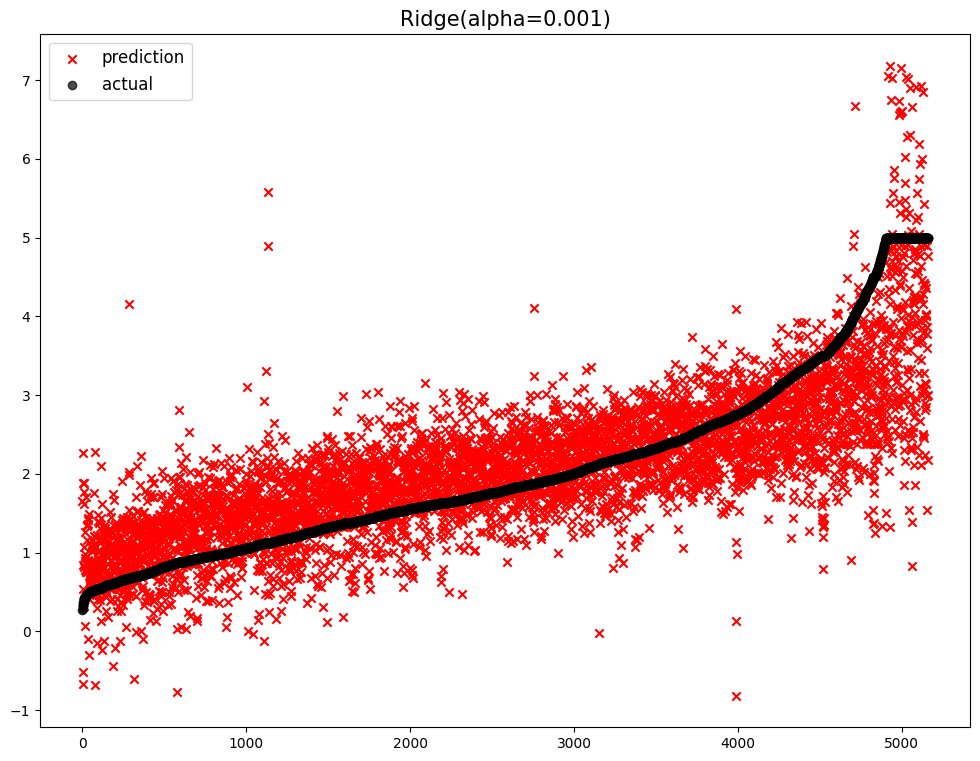

                model       mse
0    Ridge(alpha=100)  0.529615
1     Ridge(alpha=10)  0.528865
2      Ridge(alpha=1)  0.528812
3    Ridge(alpha=0.1)  0.528807
4   Ridge(alpha=0.01)  0.528807
5  Ridge(alpha=0.001)  0.528807
6    LinearRegression  0.528807


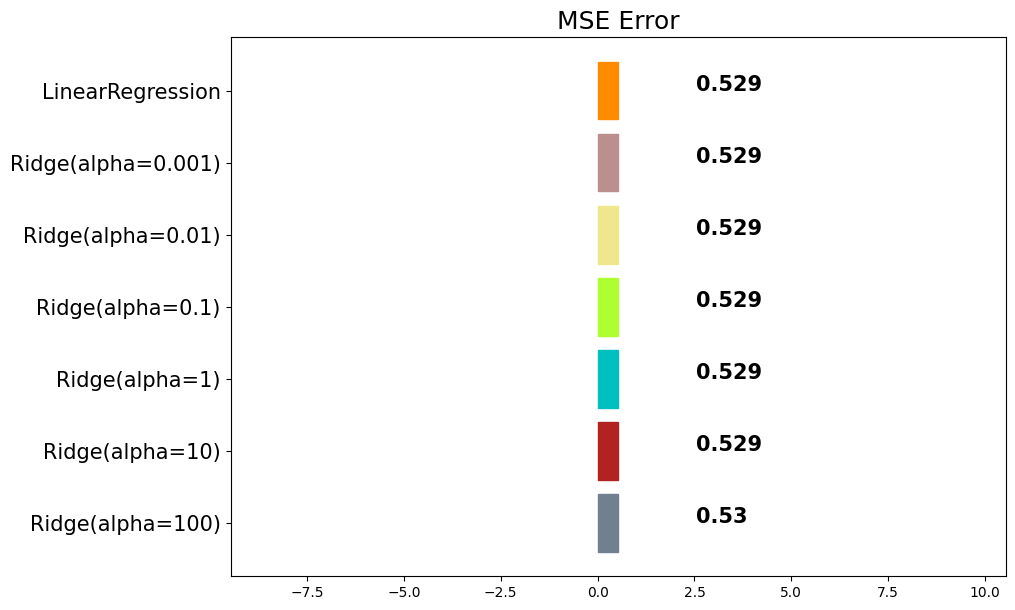

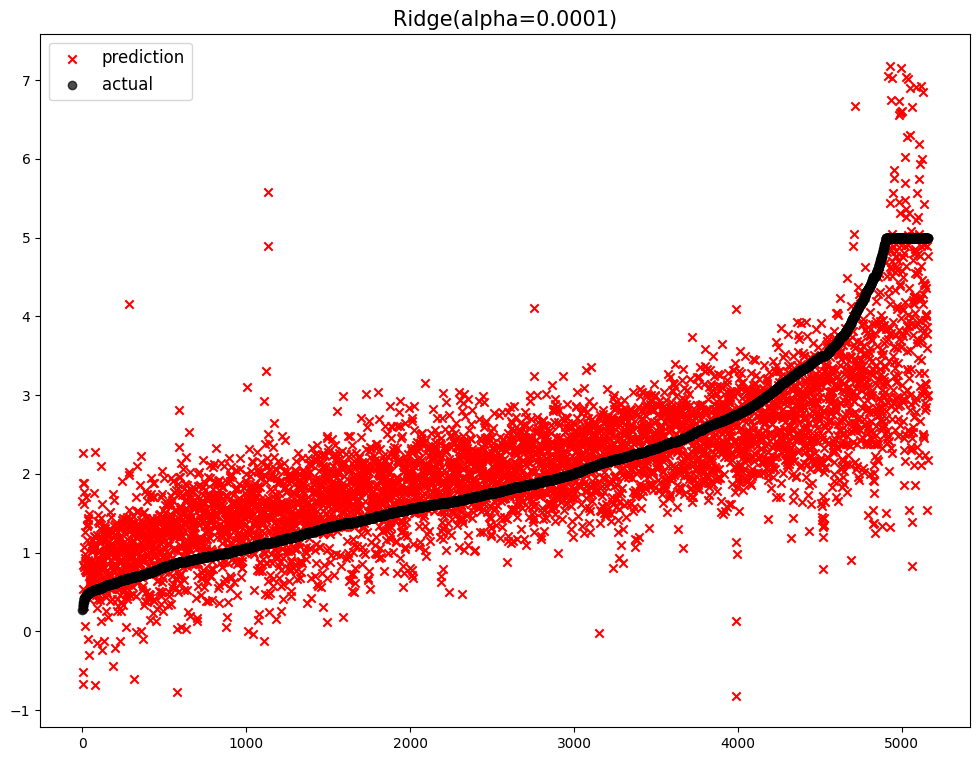

                 model       mse
0     Ridge(alpha=100)  0.529615
1      Ridge(alpha=10)  0.528865
2       Ridge(alpha=1)  0.528812
3     Ridge(alpha=0.1)  0.528807
4    Ridge(alpha=0.01)  0.528807
5   Ridge(alpha=0.001)  0.528807
6  Ridge(alpha=0.0001)  0.528807
7     LinearRegression  0.528807


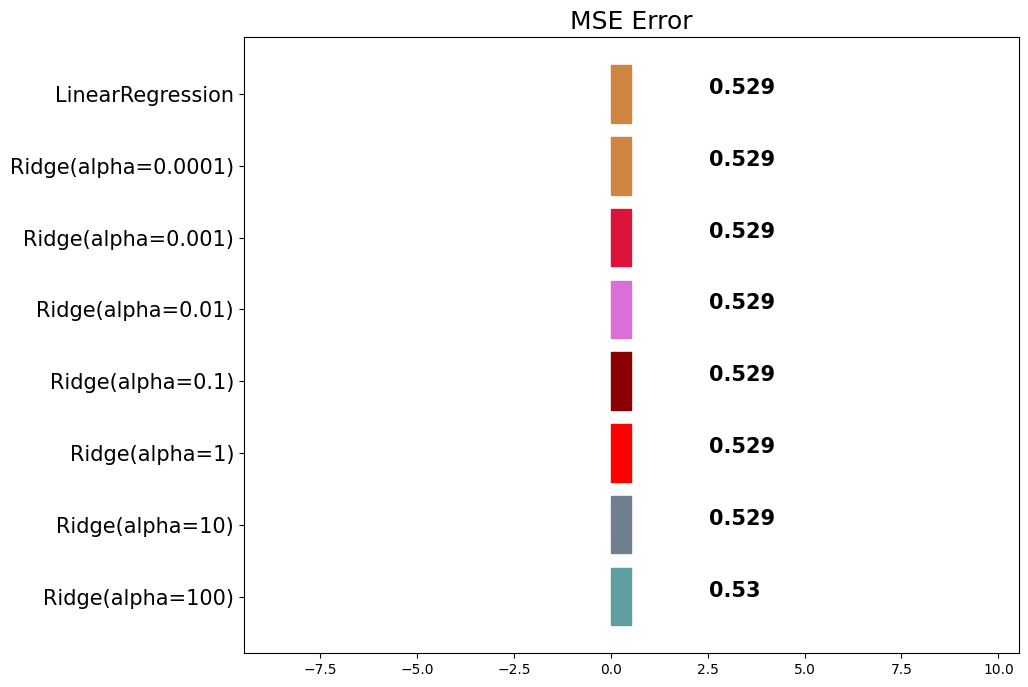

In [34]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [35]:
x_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [36]:
ridge.coef_

array([ 0.43657874,  0.00940921, -0.1036546 ,  0.62831368, -0.00000548,
       -0.00392705, -0.42138304, -0.43410702])

In [37]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

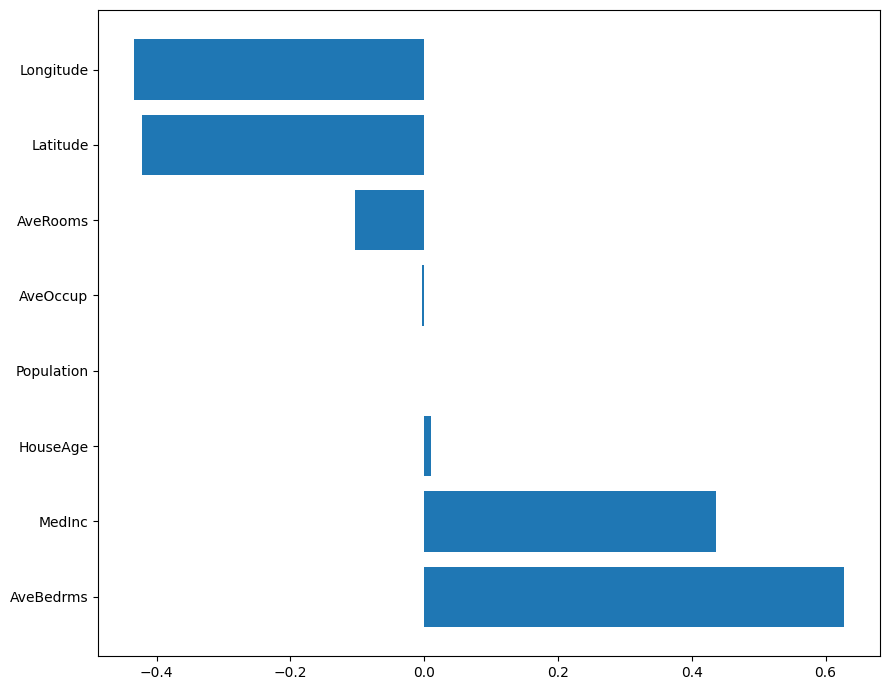

In [38]:
plot_coef(x_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [39]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

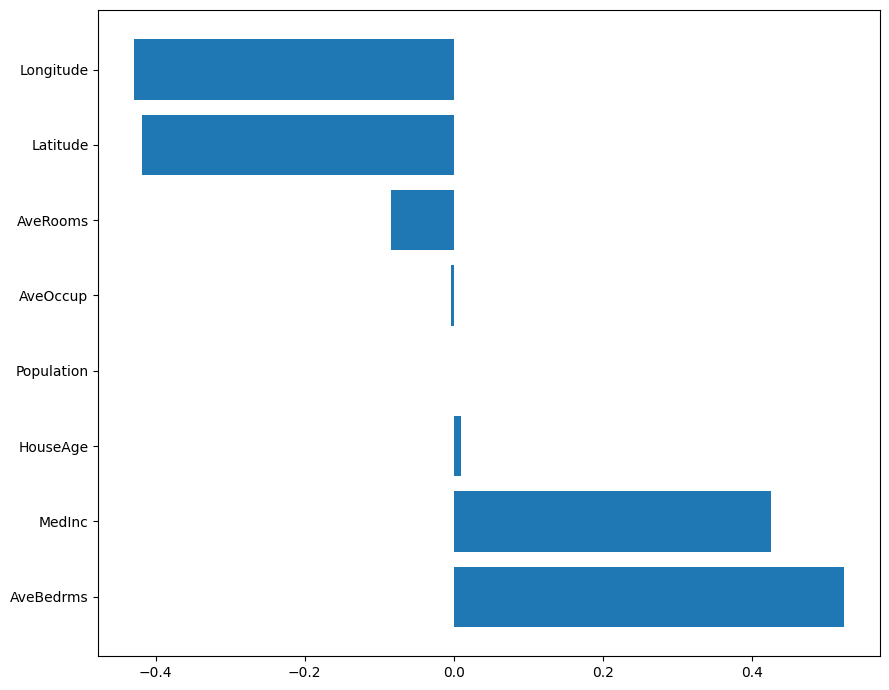

In [40]:
plot_coef(x_train.columns, ridge_100.coef_)

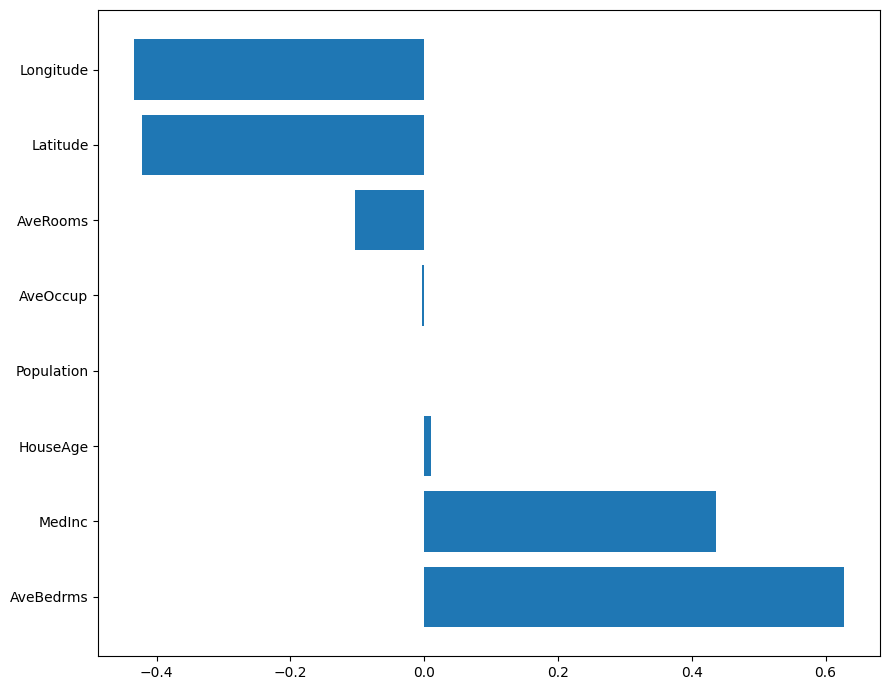

In [41]:
plot_coef(x_train.columns, ridge_001.coef_)

In [42]:
from sklearn.linear_model import Lasso

In [43]:
# 값이 커질 수록 큰 규제입니다.
# alpha값이 커질수록 직선에 가까워진다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

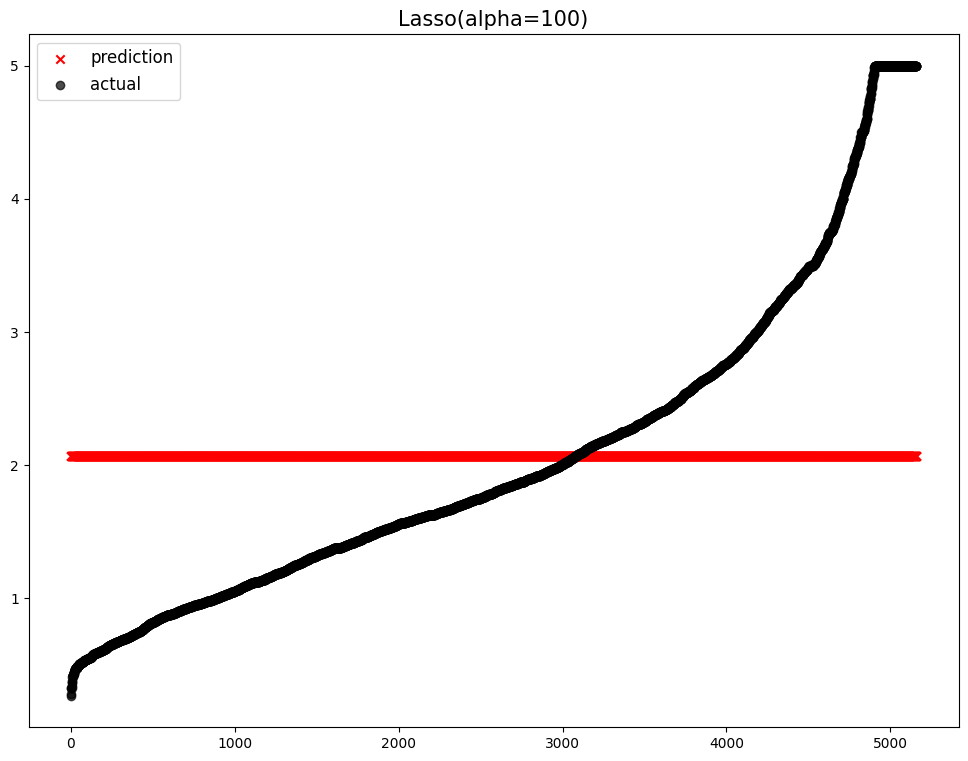

                 model       mse
0     Lasso(alpha=100)  1.337891
1     Ridge(alpha=100)  0.529615
2      Ridge(alpha=10)  0.528865
3       Ridge(alpha=1)  0.528812
4     Ridge(alpha=0.1)  0.528807
5    Ridge(alpha=0.01)  0.528807
6   Ridge(alpha=0.001)  0.528807
7  Ridge(alpha=0.0001)  0.528807
8     LinearRegression  0.528807


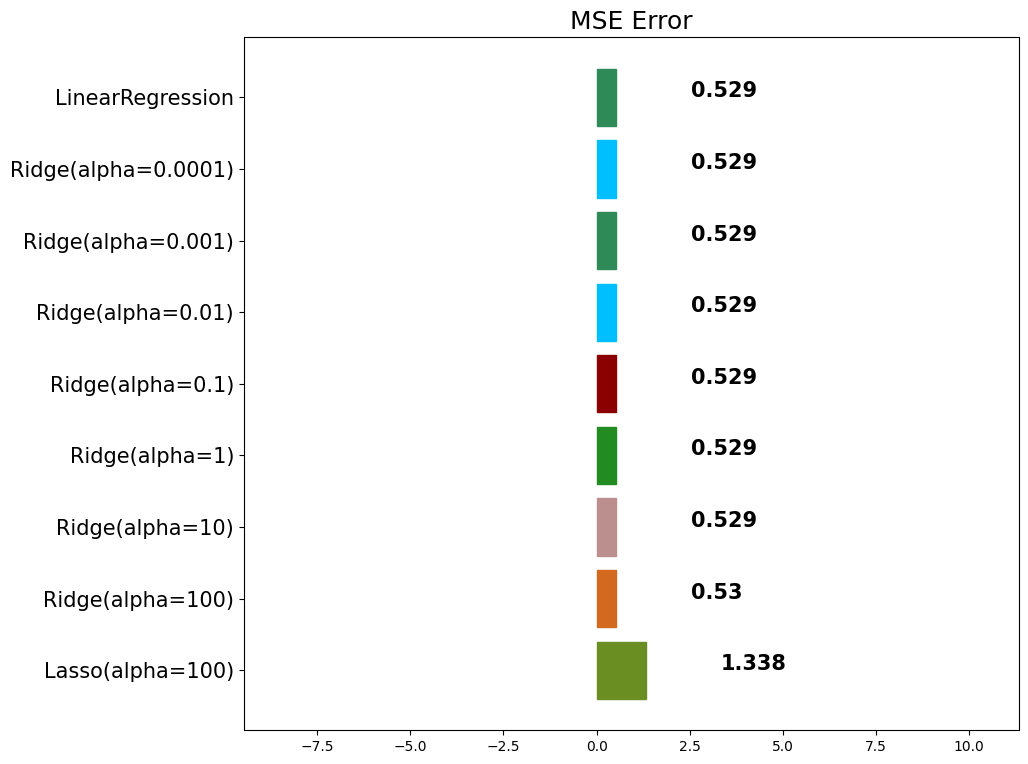

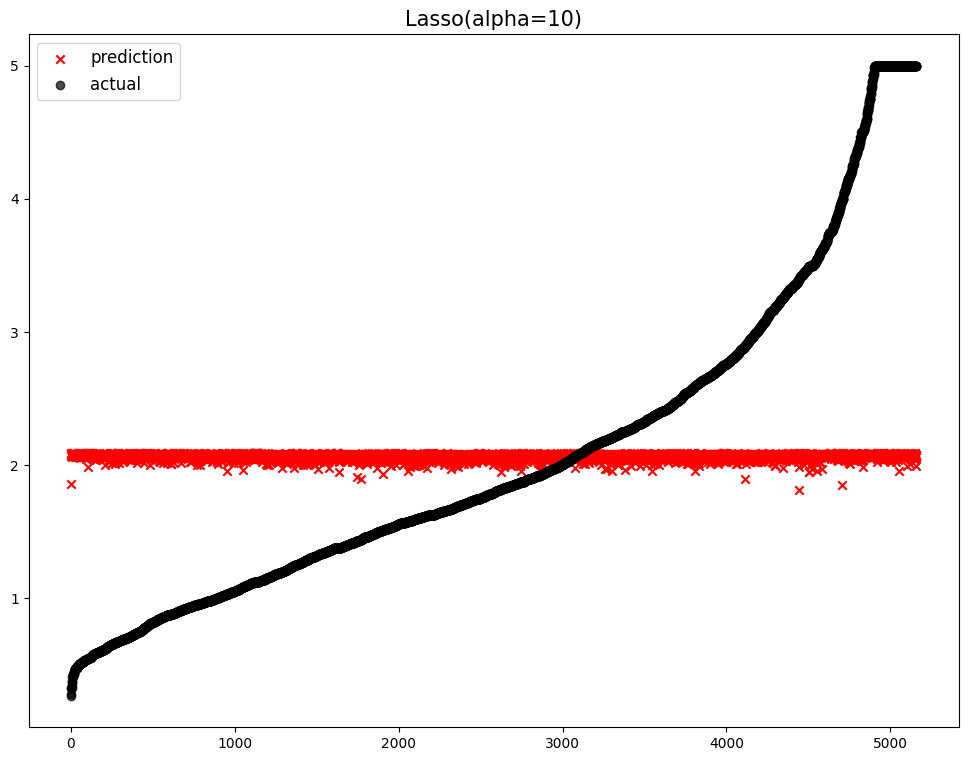

                 model       mse
0     Lasso(alpha=100)  1.337891
1      Lasso(alpha=10)  1.337414
2     Ridge(alpha=100)  0.529615
3      Ridge(alpha=10)  0.528865
4       Ridge(alpha=1)  0.528812
5     Ridge(alpha=0.1)  0.528807
6    Ridge(alpha=0.01)  0.528807
7   Ridge(alpha=0.001)  0.528807
8  Ridge(alpha=0.0001)  0.528807
9     LinearRegression  0.528807


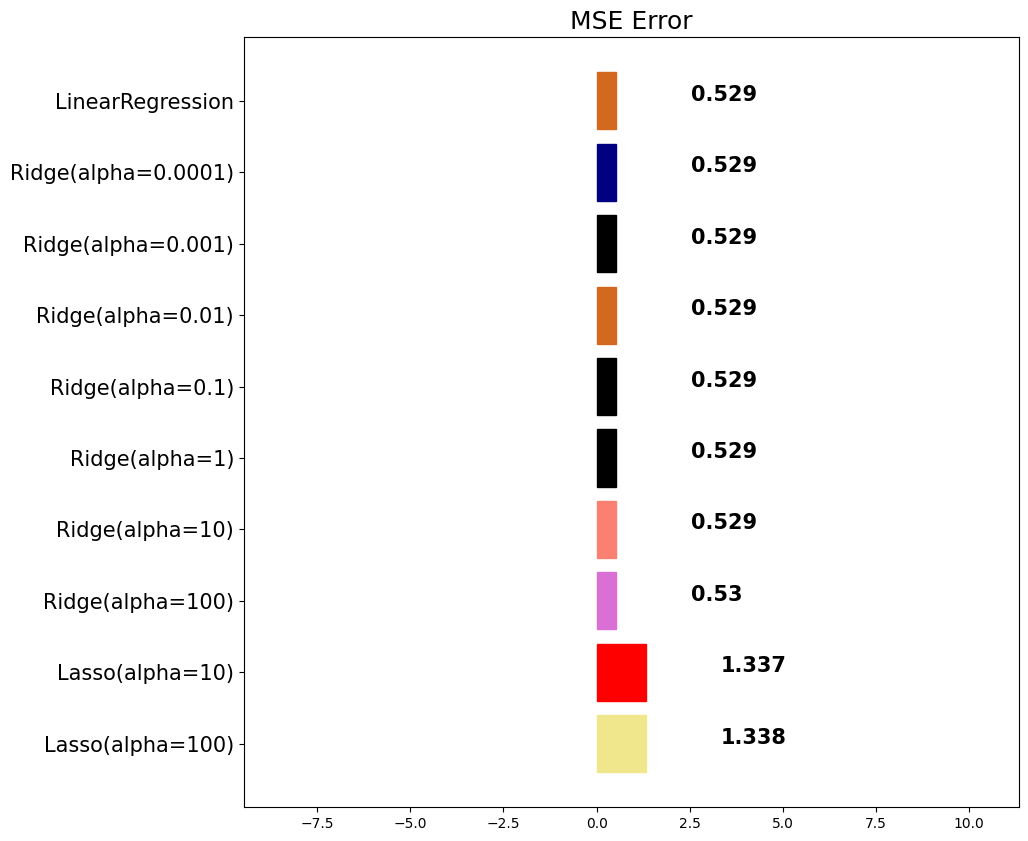

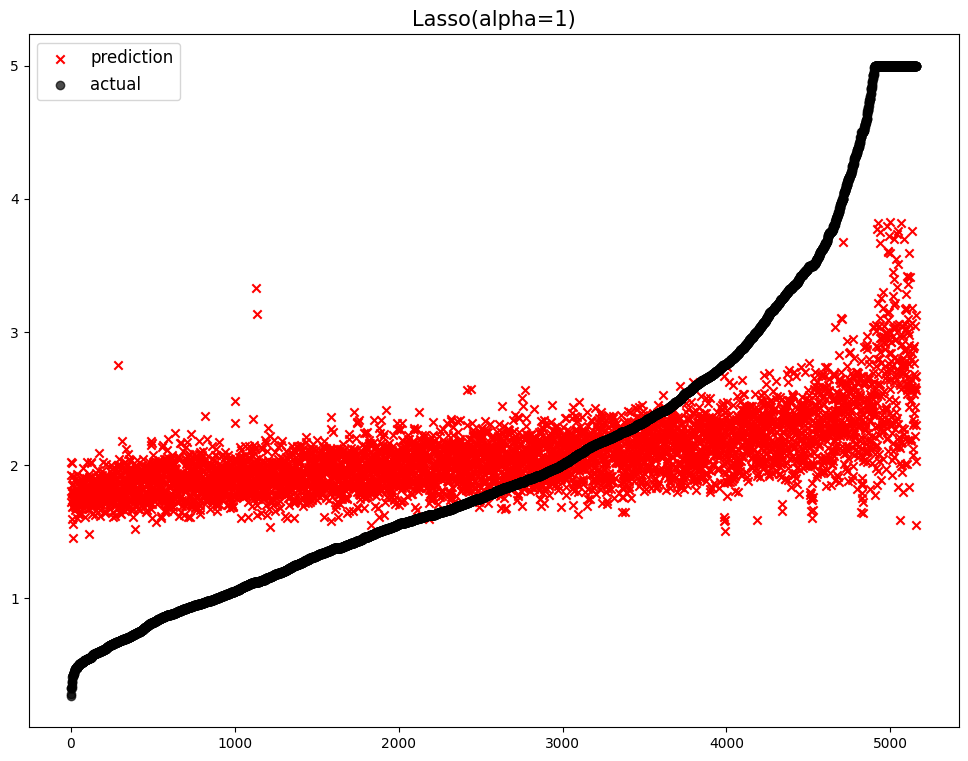

                  model       mse
0      Lasso(alpha=100)  1.337891
1       Lasso(alpha=10)  1.337414
2        Lasso(alpha=1)  0.955268
3      Ridge(alpha=100)  0.529615
4       Ridge(alpha=10)  0.528865
5        Ridge(alpha=1)  0.528812
6      Ridge(alpha=0.1)  0.528807
7     Ridge(alpha=0.01)  0.528807
8    Ridge(alpha=0.001)  0.528807
9   Ridge(alpha=0.0001)  0.528807
10     LinearRegression  0.528807


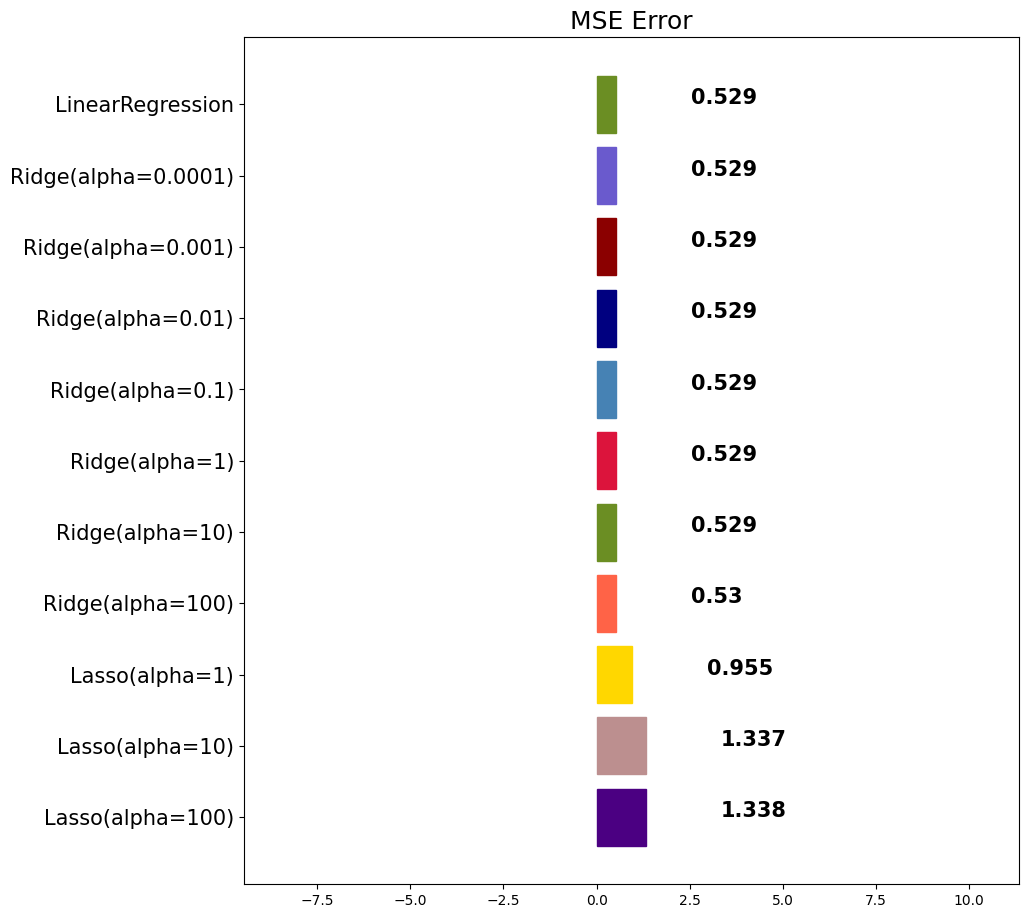

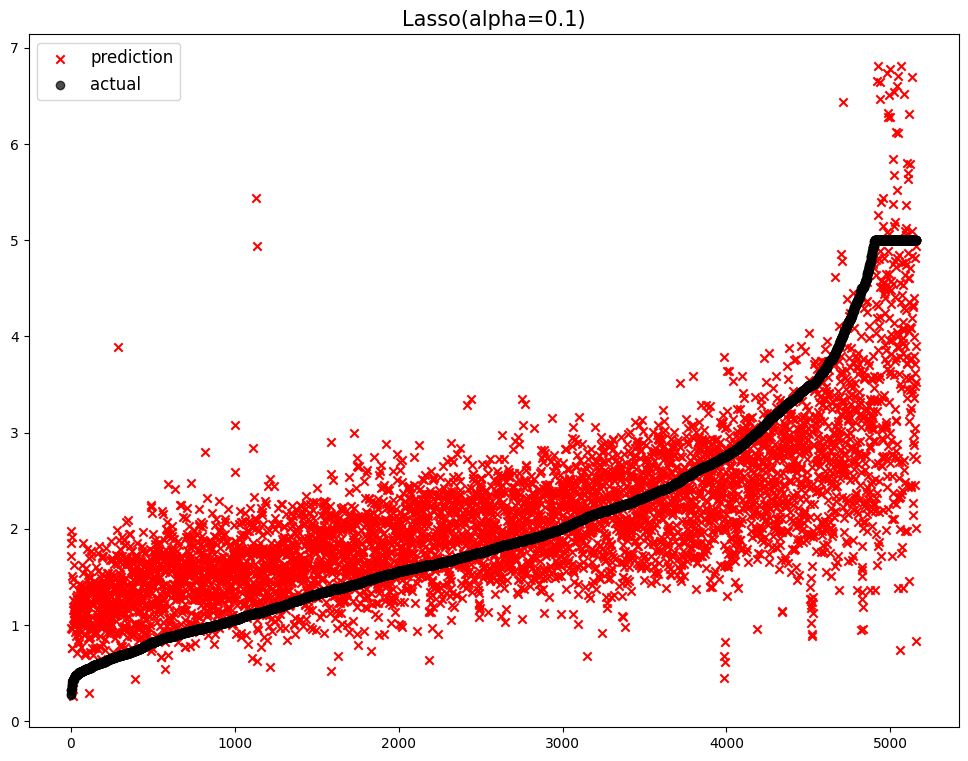

                  model       mse
0      Lasso(alpha=100)  1.337891
1       Lasso(alpha=10)  1.337414
2        Lasso(alpha=1)  0.955268
3      Lasso(alpha=0.1)  0.609989
4      Ridge(alpha=100)  0.529615
5       Ridge(alpha=10)  0.528865
6        Ridge(alpha=1)  0.528812
7      Ridge(alpha=0.1)  0.528807
8     Ridge(alpha=0.01)  0.528807
9    Ridge(alpha=0.001)  0.528807
10  Ridge(alpha=0.0001)  0.528807
11     LinearRegression  0.528807


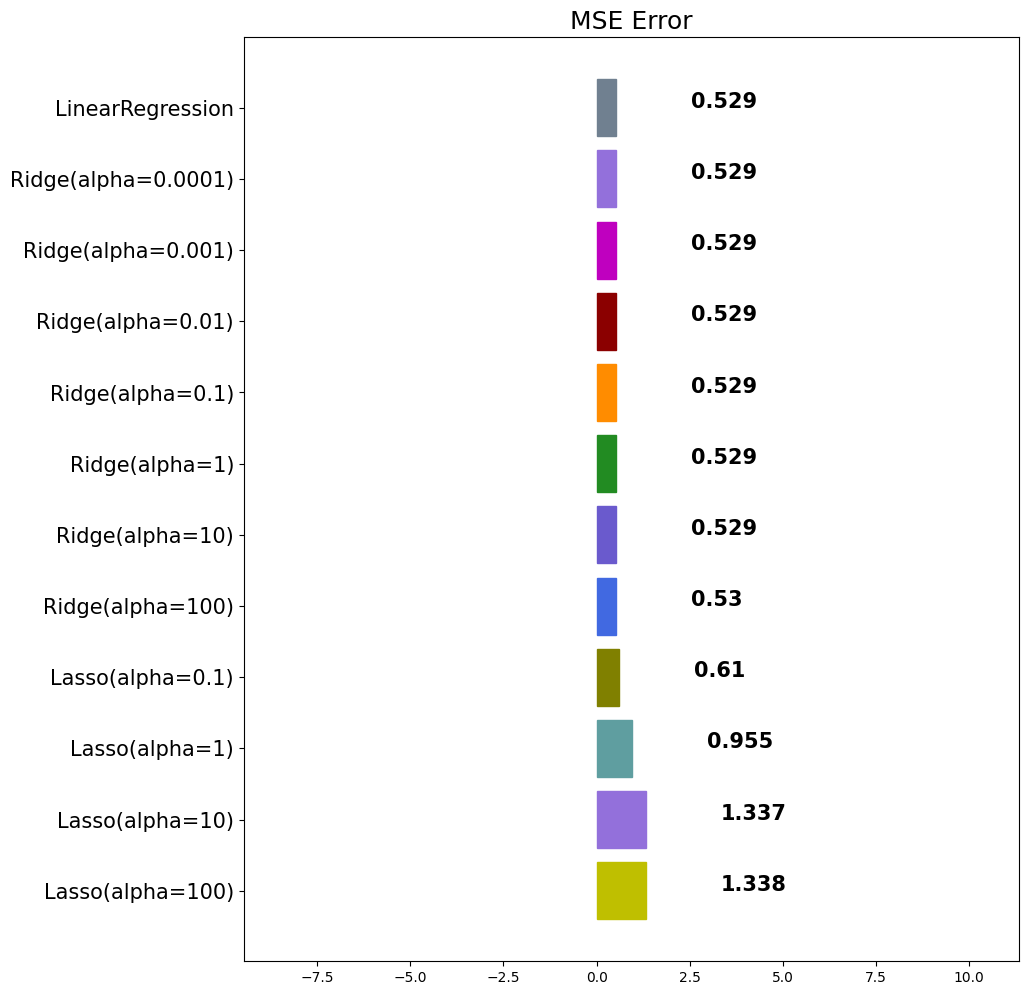

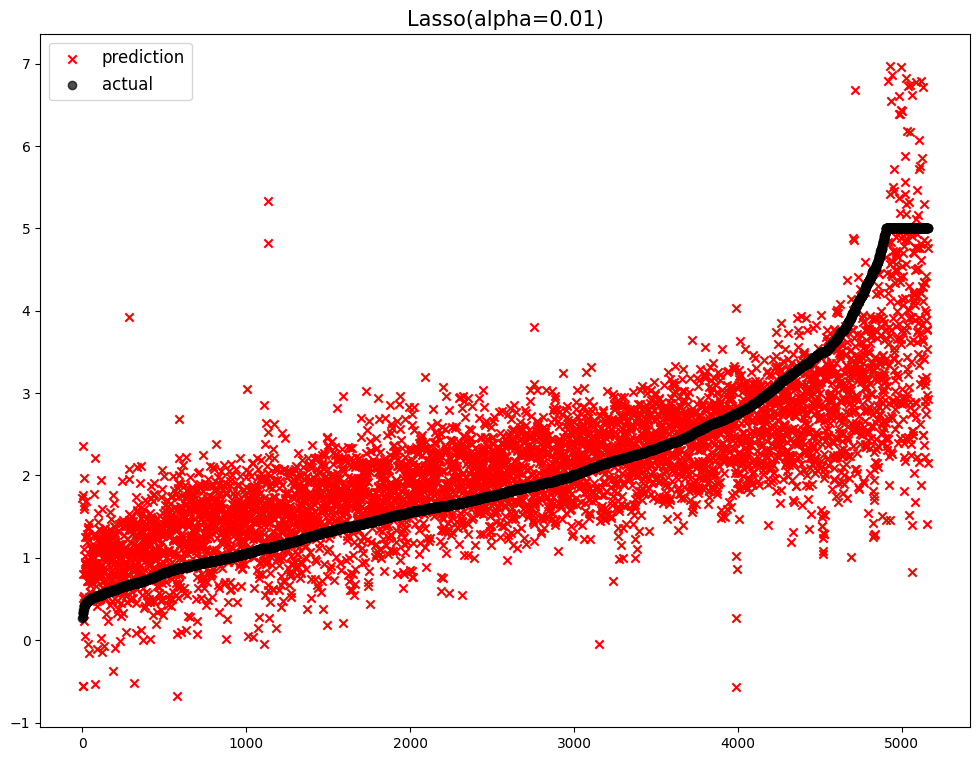

                  model       mse
0      Lasso(alpha=100)  1.337891
1       Lasso(alpha=10)  1.337414
2        Lasso(alpha=1)  0.955268
3      Lasso(alpha=0.1)  0.609989
4     Lasso(alpha=0.01)  0.534557
5      Ridge(alpha=100)  0.529615
6       Ridge(alpha=10)  0.528865
7        Ridge(alpha=1)  0.528812
8      Ridge(alpha=0.1)  0.528807
9     Ridge(alpha=0.01)  0.528807
10   Ridge(alpha=0.001)  0.528807
11  Ridge(alpha=0.0001)  0.528807
12     LinearRegression  0.528807


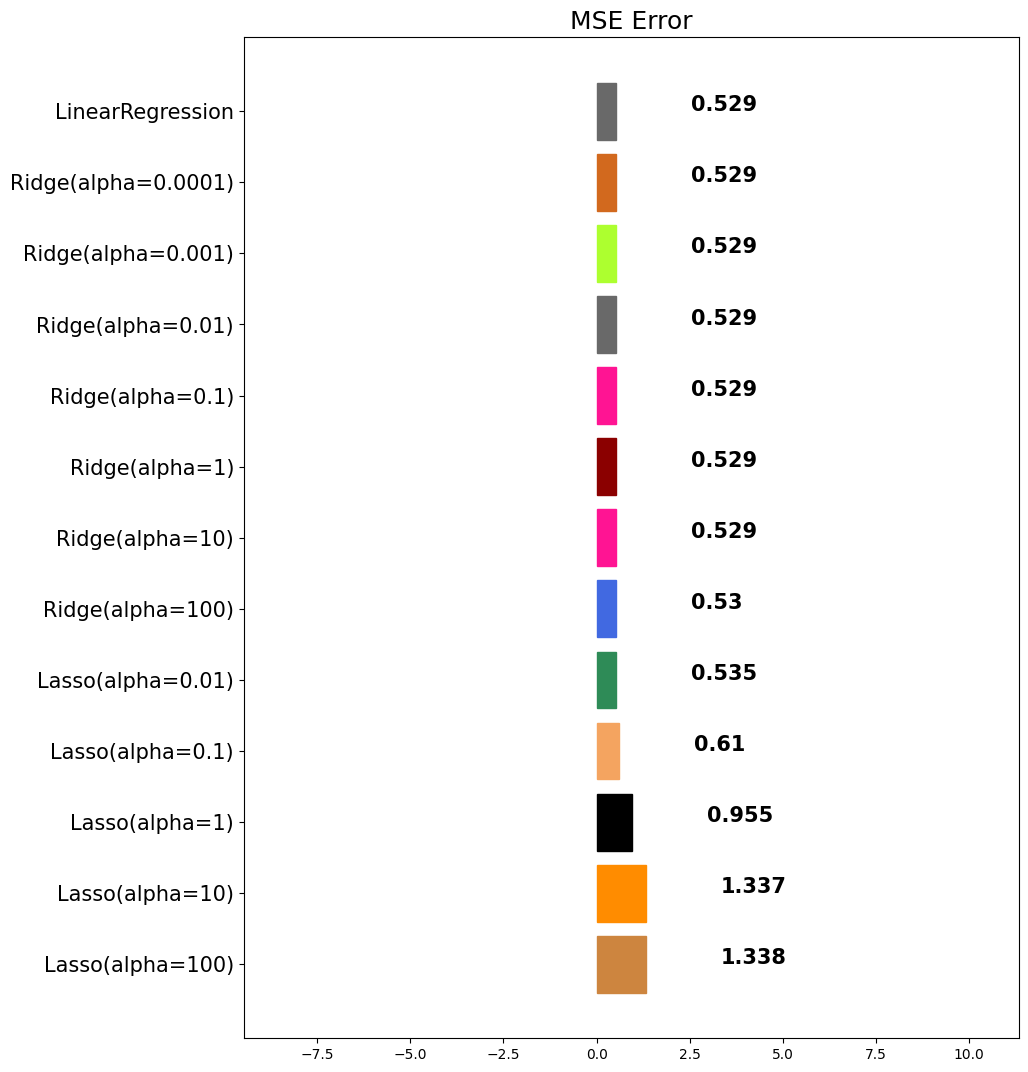

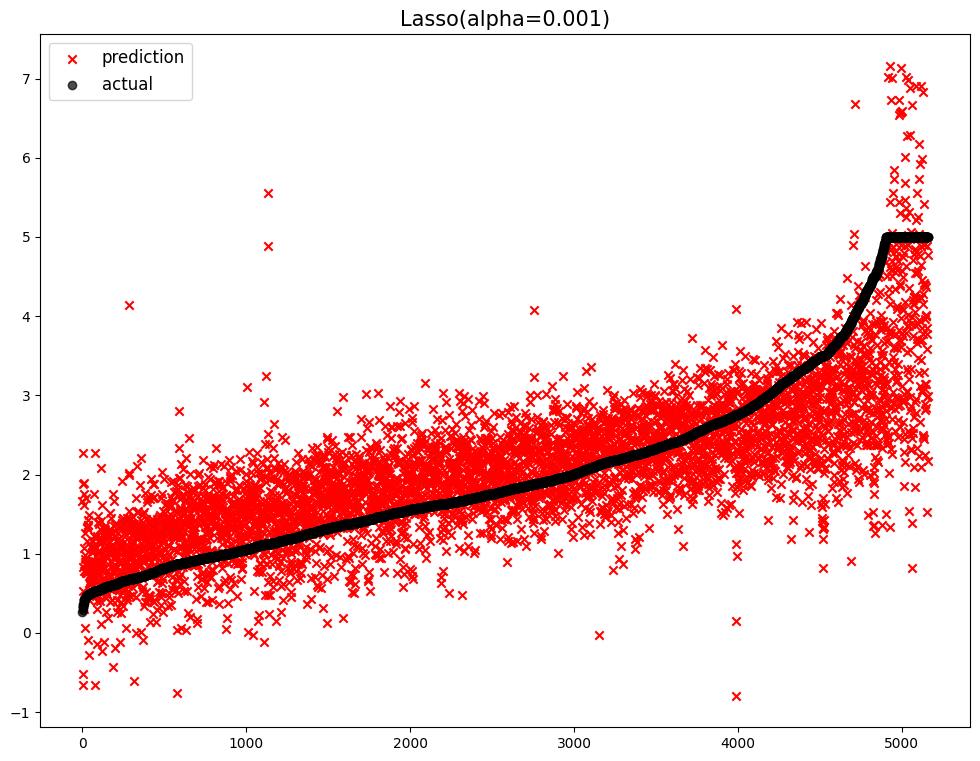

                  model       mse
0      Lasso(alpha=100)  1.337891
1       Lasso(alpha=10)  1.337414
2        Lasso(alpha=1)  0.955268
3      Lasso(alpha=0.1)  0.609989
4     Lasso(alpha=0.01)  0.534557
5      Ridge(alpha=100)  0.529615
6    Lasso(alpha=0.001)  0.529007
7       Ridge(alpha=10)  0.528865
8        Ridge(alpha=1)  0.528812
9      Ridge(alpha=0.1)  0.528807
10    Ridge(alpha=0.01)  0.528807
11   Ridge(alpha=0.001)  0.528807
12  Ridge(alpha=0.0001)  0.528807
13     LinearRegression  0.528807


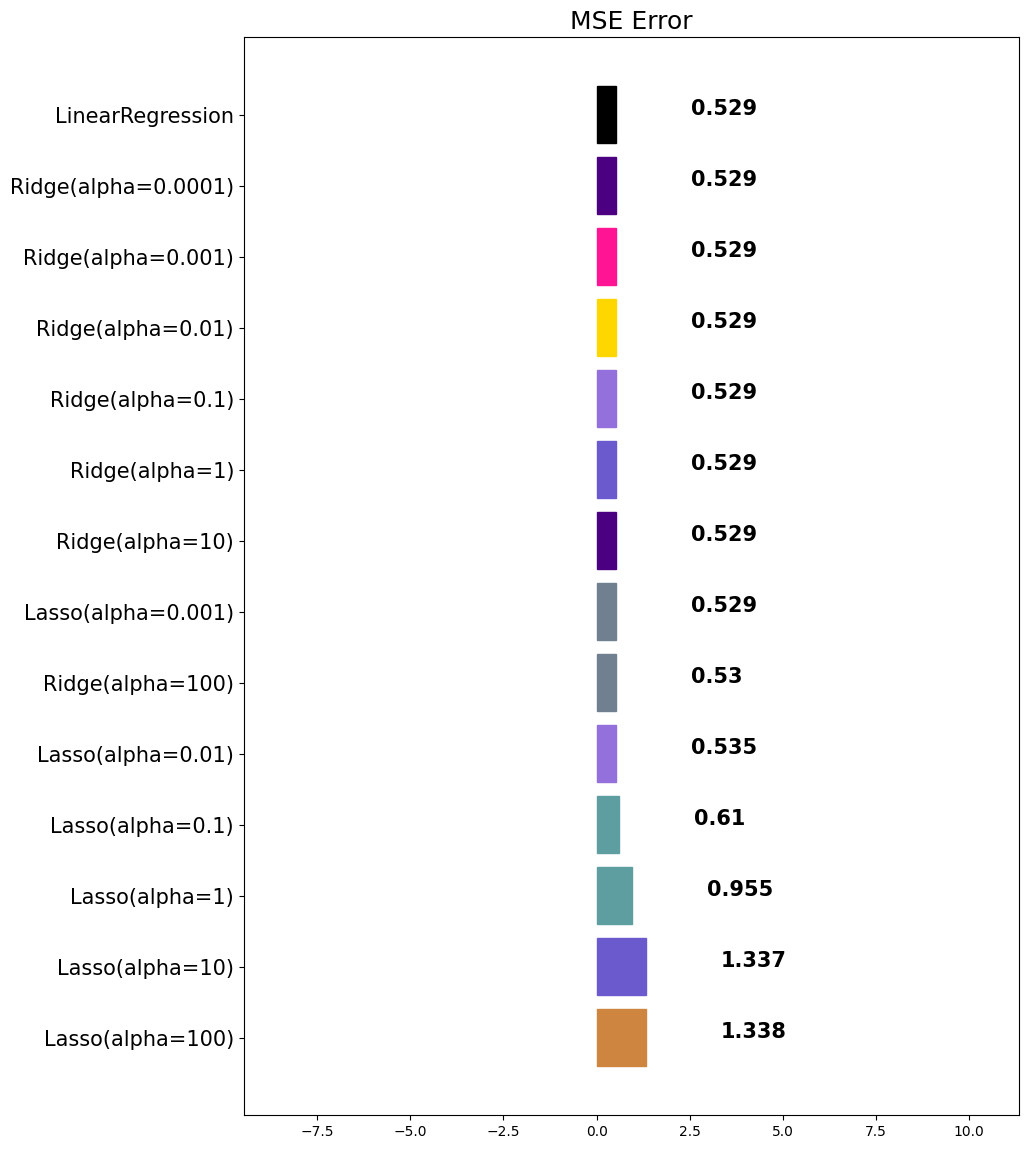

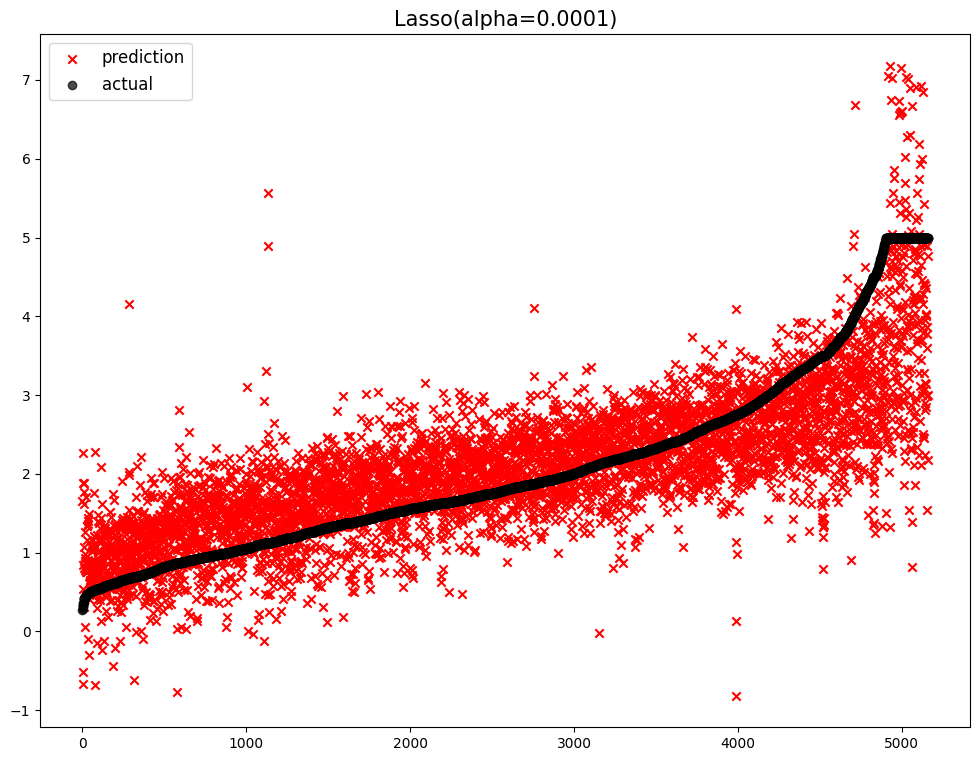

                  model       mse
0      Lasso(alpha=100)  1.337891
1       Lasso(alpha=10)  1.337414
2        Lasso(alpha=1)  0.955268
3      Lasso(alpha=0.1)  0.609989
4     Lasso(alpha=0.01)  0.534557
5      Ridge(alpha=100)  0.529615
6    Lasso(alpha=0.001)  0.529007
7       Ridge(alpha=10)  0.528865
8   Lasso(alpha=0.0001)  0.528823
9        Ridge(alpha=1)  0.528812
10     Ridge(alpha=0.1)  0.528807
11    Ridge(alpha=0.01)  0.528807
12   Ridge(alpha=0.001)  0.528807
13  Ridge(alpha=0.0001)  0.528807
14     LinearRegression  0.528807


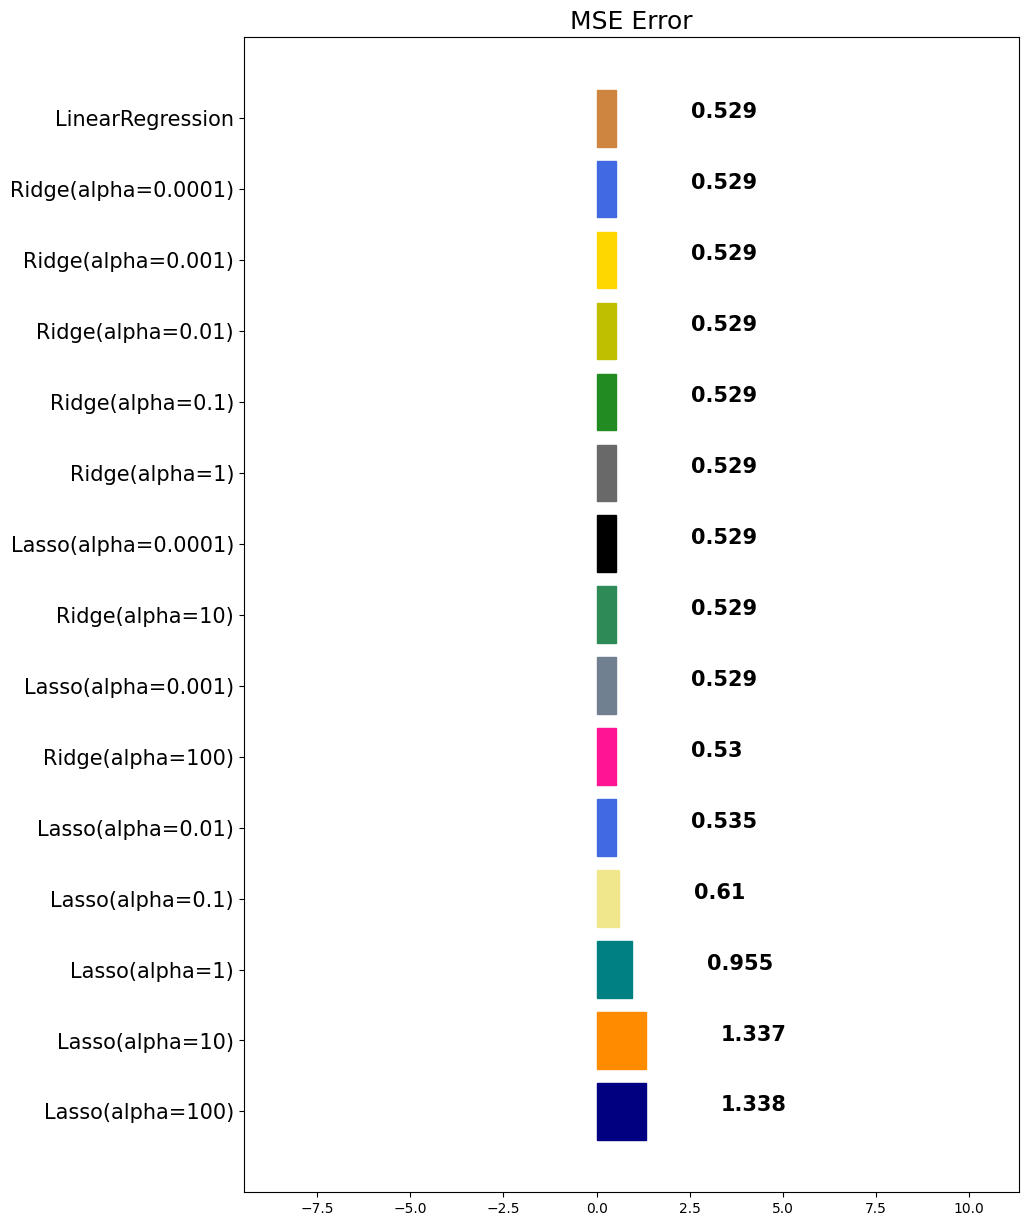

In [44]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [45]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

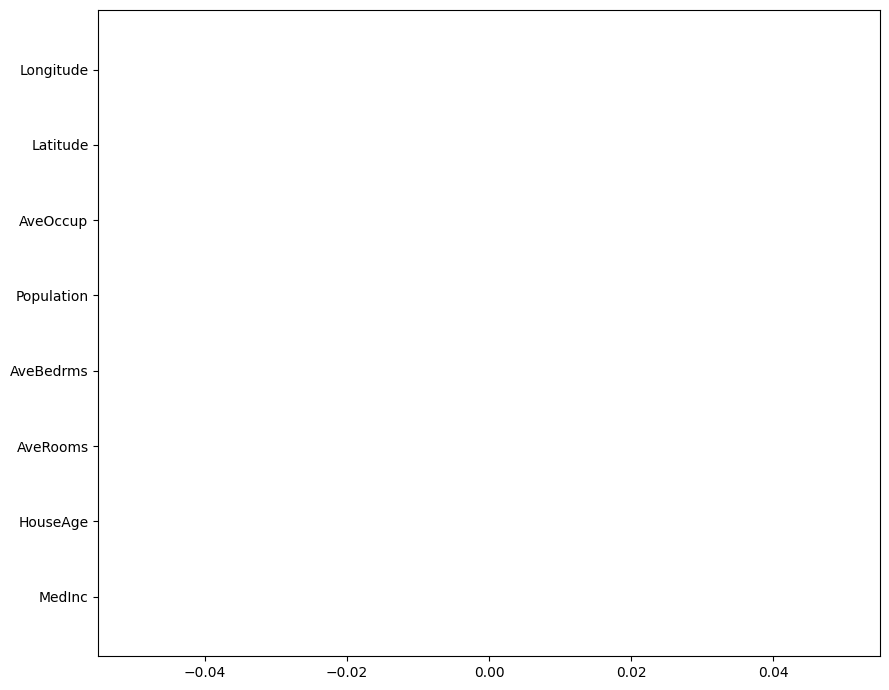

In [46]:
plot_coef(x_train.columns, lasso_100.coef_)

In [47]:
lasso_100.coef_

array([0., 0., 0., 0., 0., 0., 0., 0.])

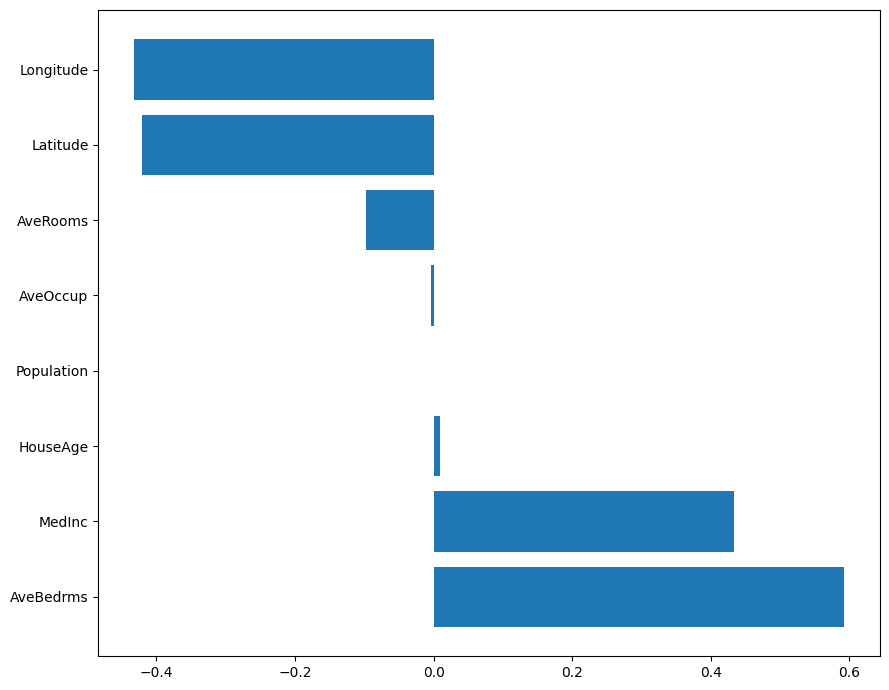

In [48]:
plot_coef(x_train.columns, lasso_001.coef_)

In [49]:
lasso_001.coef_

array([ 0.43300517,  0.00947691, -0.09680823,  0.59276419, -0.00000523,
       -0.0039072 , -0.42017502, -0.43234661])

### ElasticNet

* 엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 
* 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용 한다.
* 혼합 정도는 혼합 비율r을 사용해 조절한다.
* r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

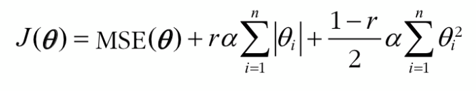

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
# ratios가 수식의 r이다.
ratios = [0.2, 0.5, 0.8]

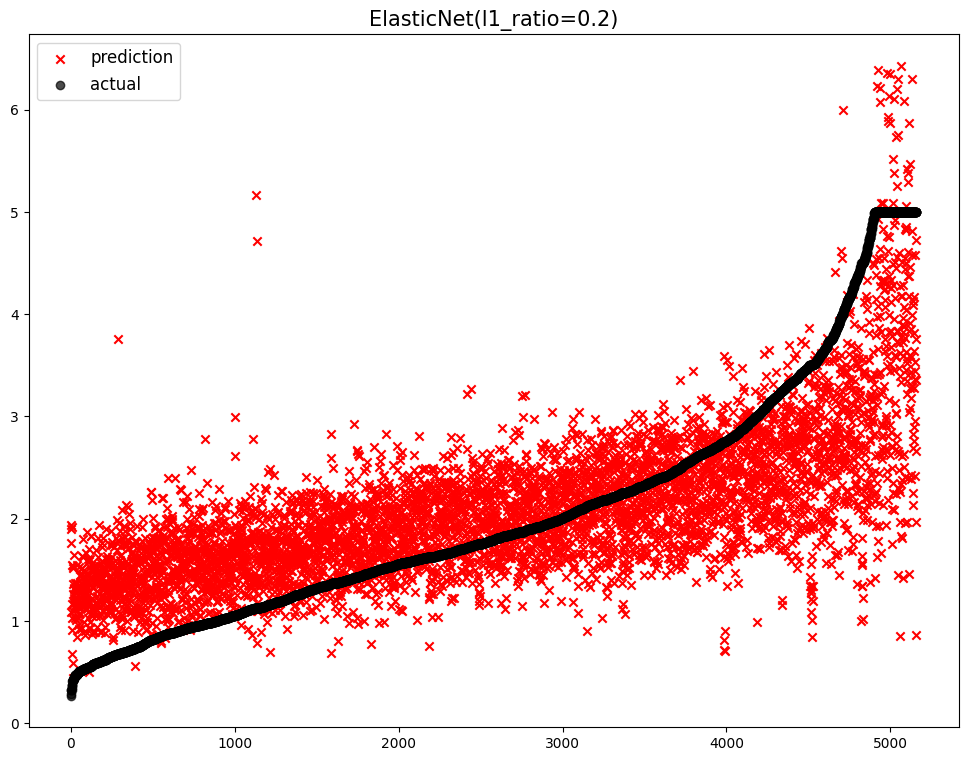

                       model       mse
0           Lasso(alpha=100)  1.337891
1            Lasso(alpha=10)  1.337414
2             Lasso(alpha=1)  0.955268
3   ElasticNet(l1_ratio=0.2)  0.642330
4           Lasso(alpha=0.1)  0.609989
5          Lasso(alpha=0.01)  0.534557
6           Ridge(alpha=100)  0.529615
7         Lasso(alpha=0.001)  0.529007
8            Ridge(alpha=10)  0.528865
9        Lasso(alpha=0.0001)  0.528823
10            Ridge(alpha=1)  0.528812
11          Ridge(alpha=0.1)  0.528807
12         Ridge(alpha=0.01)  0.528807
13        Ridge(alpha=0.001)  0.528807
14       Ridge(alpha=0.0001)  0.528807
15          LinearRegression  0.528807


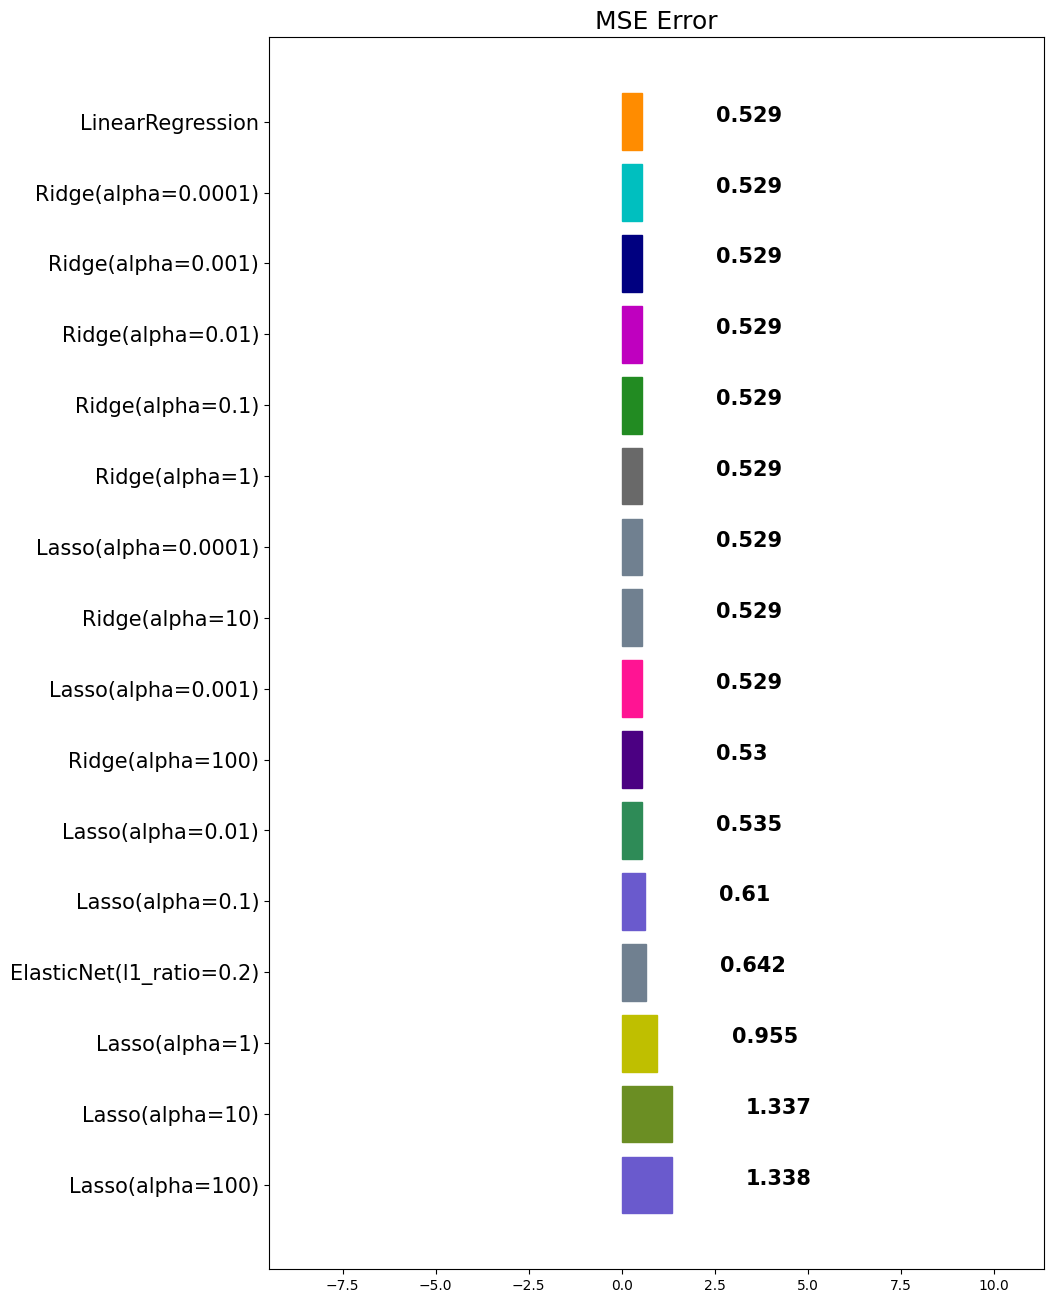

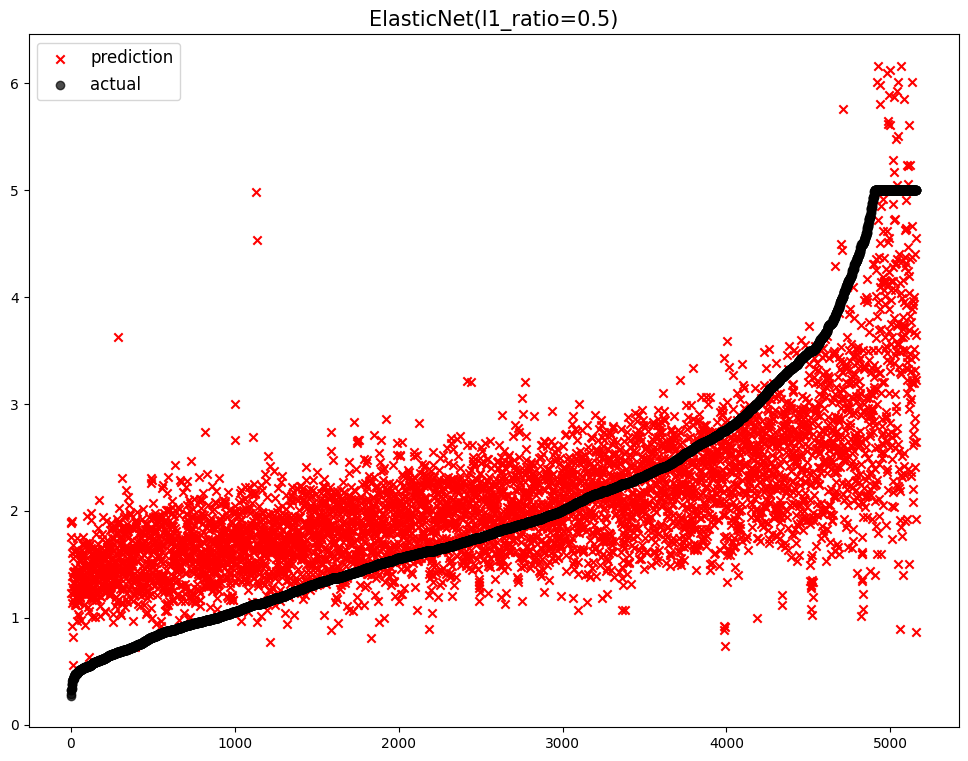

                       model       mse
0           Lasso(alpha=100)  1.337891
1            Lasso(alpha=10)  1.337414
2             Lasso(alpha=1)  0.955268
3   ElasticNet(l1_ratio=0.5)  0.685263
4   ElasticNet(l1_ratio=0.2)  0.642330
5           Lasso(alpha=0.1)  0.609989
6          Lasso(alpha=0.01)  0.534557
7           Ridge(alpha=100)  0.529615
8         Lasso(alpha=0.001)  0.529007
9            Ridge(alpha=10)  0.528865
10       Lasso(alpha=0.0001)  0.528823
11            Ridge(alpha=1)  0.528812
12          Ridge(alpha=0.1)  0.528807
13         Ridge(alpha=0.01)  0.528807
14        Ridge(alpha=0.001)  0.528807
15       Ridge(alpha=0.0001)  0.528807
16          LinearRegression  0.528807


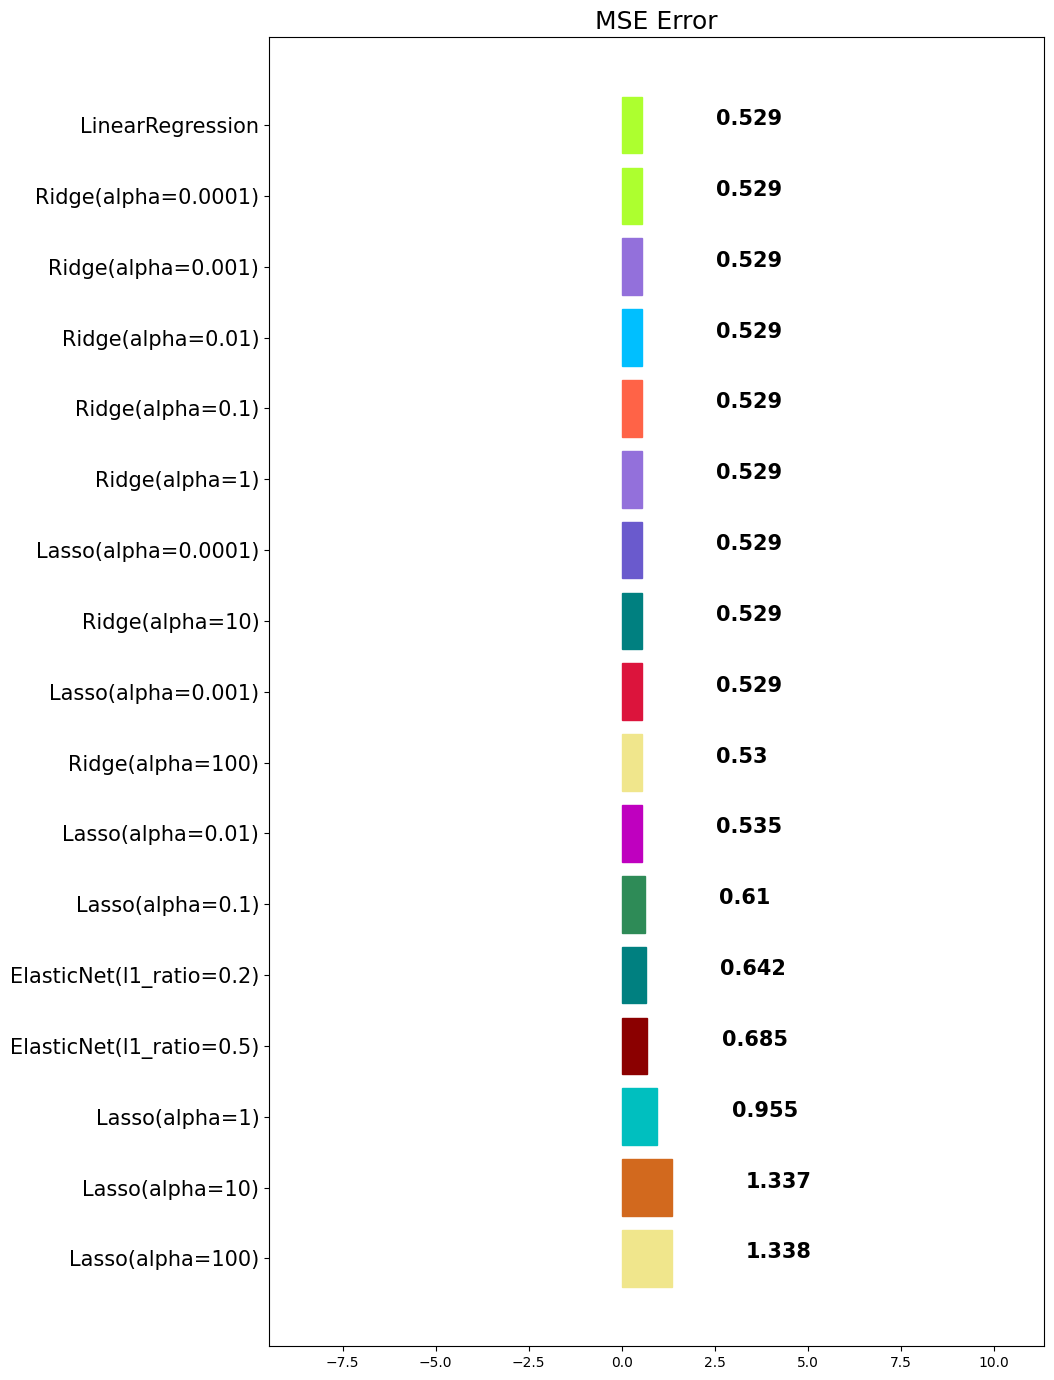

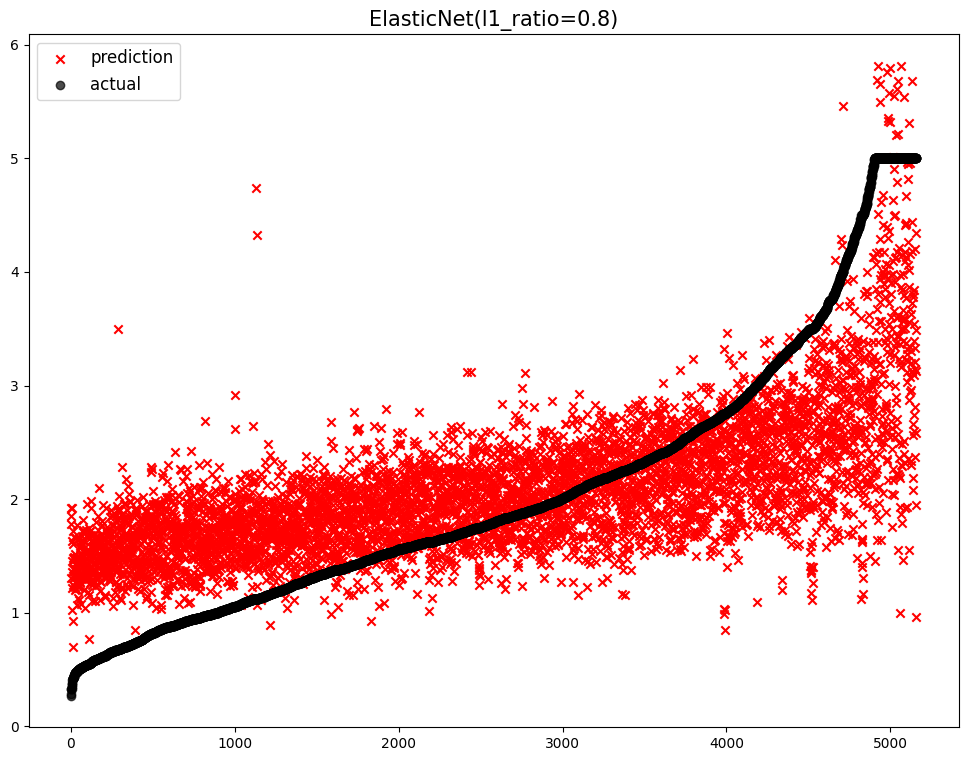

                       model       mse
0           Lasso(alpha=100)  1.337891
1            Lasso(alpha=10)  1.337414
2             Lasso(alpha=1)  0.955268
3   ElasticNet(l1_ratio=0.8)  0.707626
4   ElasticNet(l1_ratio=0.5)  0.685263
5   ElasticNet(l1_ratio=0.2)  0.642330
6           Lasso(alpha=0.1)  0.609989
7          Lasso(alpha=0.01)  0.534557
8           Ridge(alpha=100)  0.529615
9         Lasso(alpha=0.001)  0.529007
10           Ridge(alpha=10)  0.528865
11       Lasso(alpha=0.0001)  0.528823
12            Ridge(alpha=1)  0.528812
13          Ridge(alpha=0.1)  0.528807
14         Ridge(alpha=0.01)  0.528807
15        Ridge(alpha=0.001)  0.528807
16       Ridge(alpha=0.0001)  0.528807
17          LinearRegression  0.528807


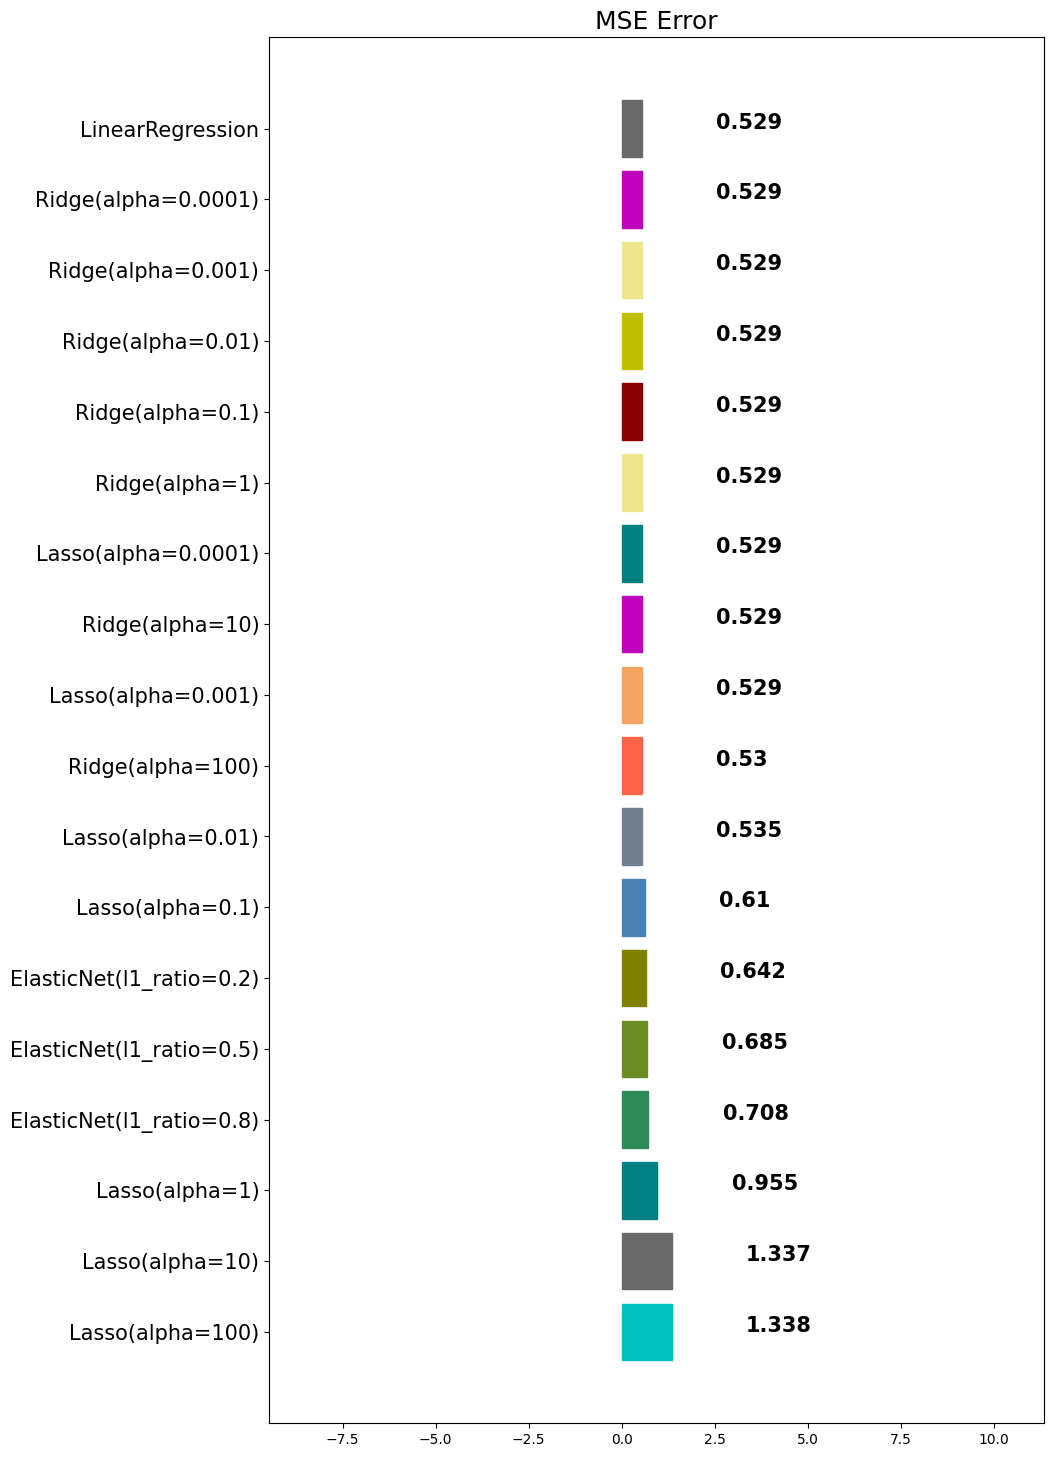

In [52]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [53]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

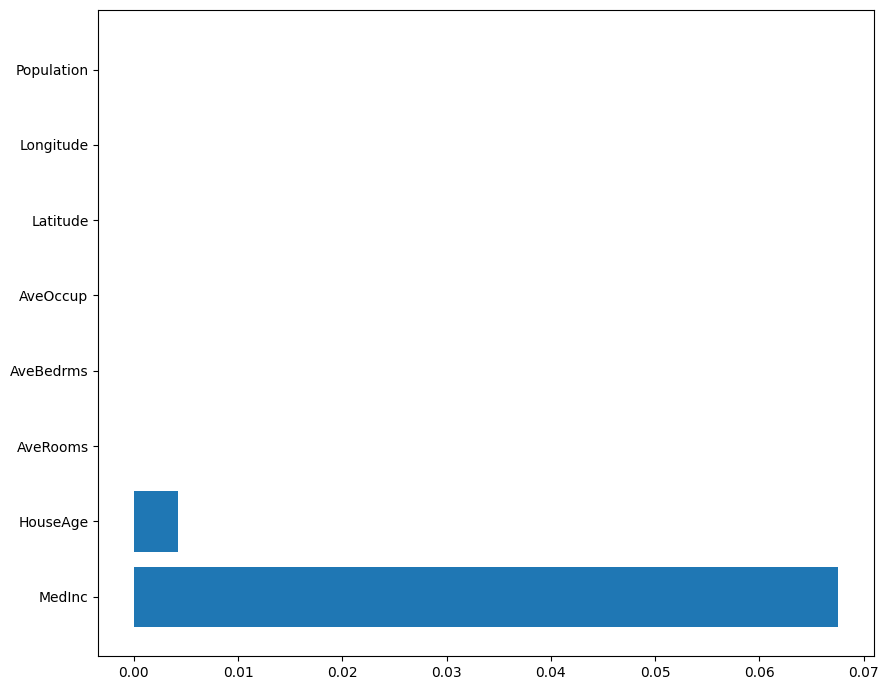

In [54]:
plot_coef(x_train.columns, elsticnet_20.coef_)

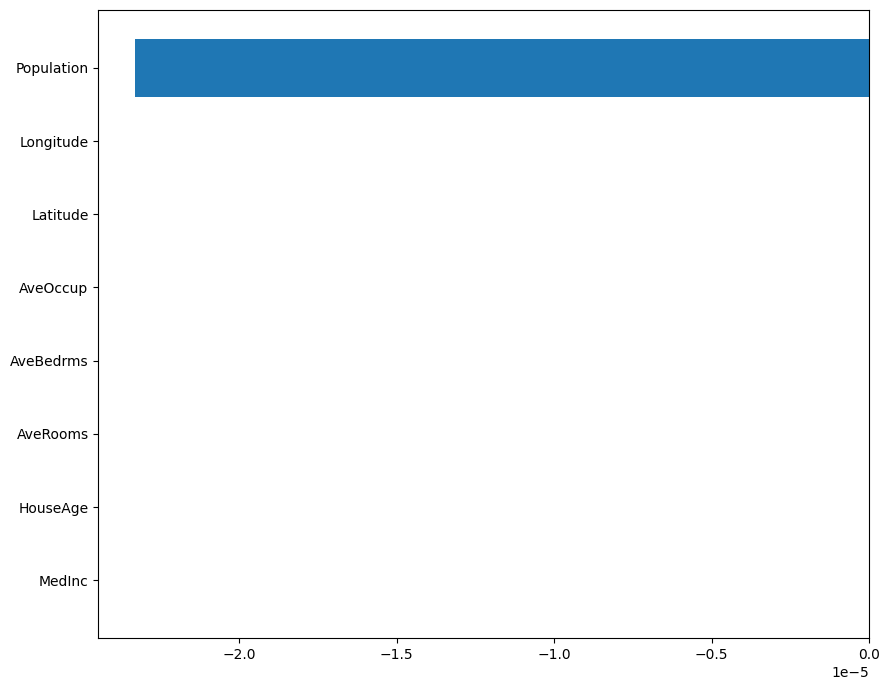

In [55]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [56]:
elsticnet_80.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00002331,
       -0.        ,  0.        ,  0.        ])

## Scaler

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [58]:
x_train.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  15480.000000  15480.000000  15480.000000  15480.000000  15480.000000   
mean       3.866063     28.656589      5.430679      1.097381   1426.989729   
std        1.890571     12.622971      2.606757      0.502651   1157.961572   
min        0.499900      1.000000      0.846154      0.375000      3.000000   
25%        2.558800     18.000000      4.433750      1.006131    786.000000   
50%        3.535700     29.000000      5.225552      1.048780   1165.500000   
75%        4.743775     37.000000      6.044921      1.099417   1717.250000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  15480.000000  15480.000000  15480.000000  
mean       3.071714     35.626209   -119.564641  
std       11.274977      2.135998      2.003221  
min        0.692308     32.540000   -124.300000  
25%        2.429301     33.930000   -121.790000  
50%        2.817544     34.250000   -118.490000  
75%        3.282273     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [59]:
std_scaler = StandardScaler()

In [60]:
std_scaled = std_scaler.fit_transform(x_train)

In [61]:
round(pd.DataFrame(std_scaled).describe(), 2)

0         1         2         3         4         5         6  \
count  15480.00  15480.00  15480.00  15480.00  15480.00  15480.00  15480.00   
mean       0.00     -0.00     -0.00      0.00     -0.00     -0.00      0.00   
std        1.00      1.00      1.00      1.00      1.00      1.00      1.00   
min       -1.78     -2.19     -1.76     -1.44     -1.23     -0.21     -1.44   
25%       -0.69     -0.84     -0.38     -0.18     -0.55     -0.06     -0.79   
50%       -0.17      0.03     -0.08     -0.10     -0.23     -0.02     -0.64   
75%        0.46      0.66      0.24      0.00      0.25      0.02      0.98   
max        5.89      1.85     52.36     65.59     29.58    110.00      2.96   

              7  
count  15480.00  
mean       0.00  
std        1.00  
min       -2.36  
25%       -1.11  
50%        0.54  
75%        0.78  
max        2.62

### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [62]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [63]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

0         1         2         3         4         5         6  \
count  15480.00  15480.00  15480.00  15480.00  15480.00  15480.00  15480.00   
mean       0.23      0.54      0.03      0.02      0.04      0.00      0.33   
std        0.13      0.25      0.02      0.01      0.03      0.01      0.23   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.14      0.33      0.03      0.02      0.02      0.00      0.15   
50%        0.21      0.55      0.03      0.02      0.03      0.00      0.18   
75%        0.29      0.71      0.04      0.02      0.05      0.00      0.55   
max        1.00      1.00      1.00      1.00      1.00      1.00      1.00   

              7  
count  15480.00  
mean       0.47  
std        0.20  
min        0.00  
25%        0.25  
50%        0.58  
75%        0.63  
max        1.00

### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [64]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [65]:
round(pd.DataFrame(robust_scaled).median(), 2)

0    0.0
1    0.0
2   -0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
dtype: float64

### 파이프라인

In [66]:
from sklearn.pipeline import make_pipeline

In [67]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [68]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

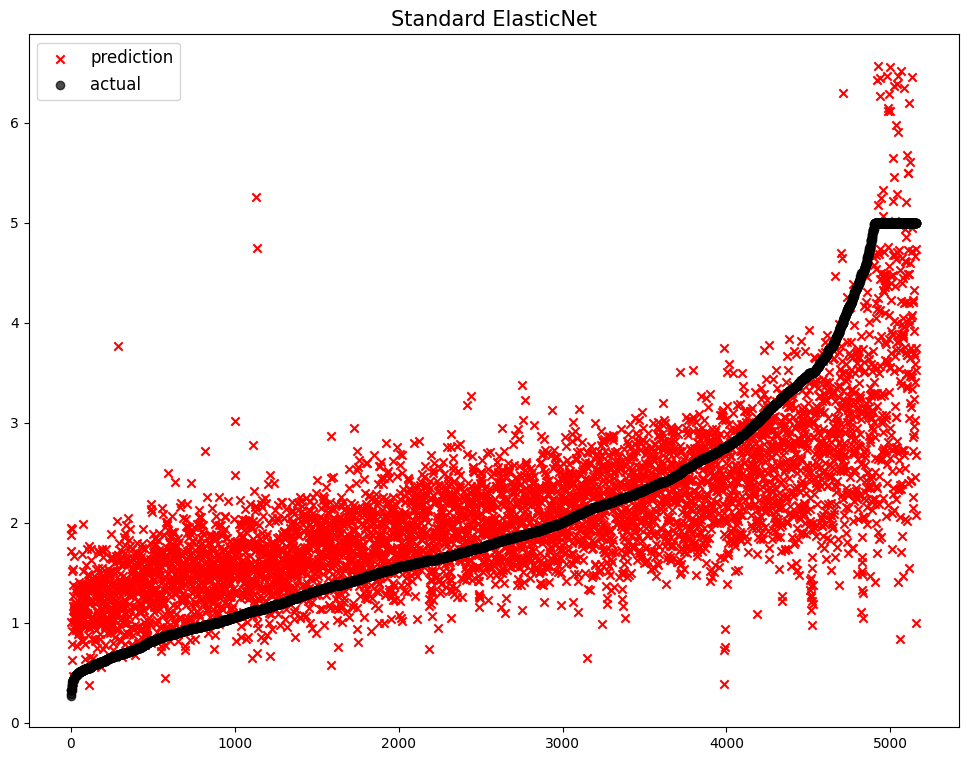

                       model       mse
0           Lasso(alpha=100)  1.337891
1            Lasso(alpha=10)  1.337414
2             Lasso(alpha=1)  0.955268
3   ElasticNet(l1_ratio=0.8)  0.707626
4   ElasticNet(l1_ratio=0.5)  0.685263
5   ElasticNet(l1_ratio=0.2)  0.642330
6           Lasso(alpha=0.1)  0.609989
7        Standard ElasticNet  0.597131
8          Lasso(alpha=0.01)  0.534557
9           Ridge(alpha=100)  0.529615
10        Lasso(alpha=0.001)  0.529007
11           Ridge(alpha=10)  0.528865
12       Lasso(alpha=0.0001)  0.528823
13            Ridge(alpha=1)  0.528812
14          Ridge(alpha=0.1)  0.528807
15         Ridge(alpha=0.01)  0.528807
16        Ridge(alpha=0.001)  0.528807
17       Ridge(alpha=0.0001)  0.528807
18          LinearRegression  0.528807


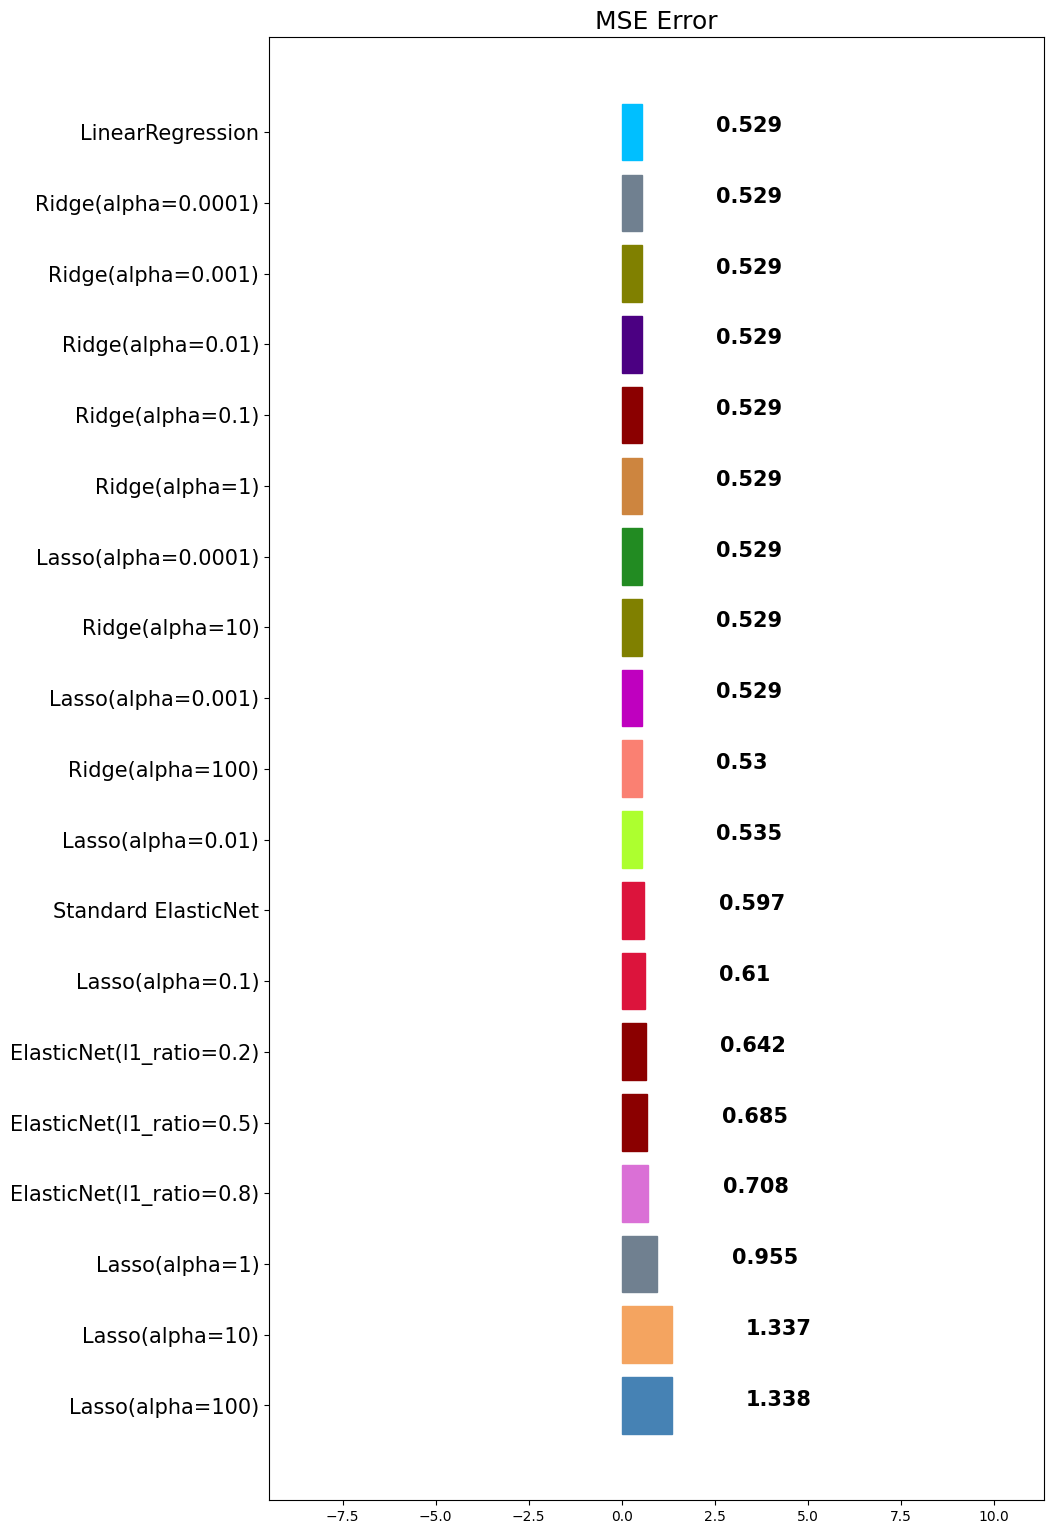

In [69]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

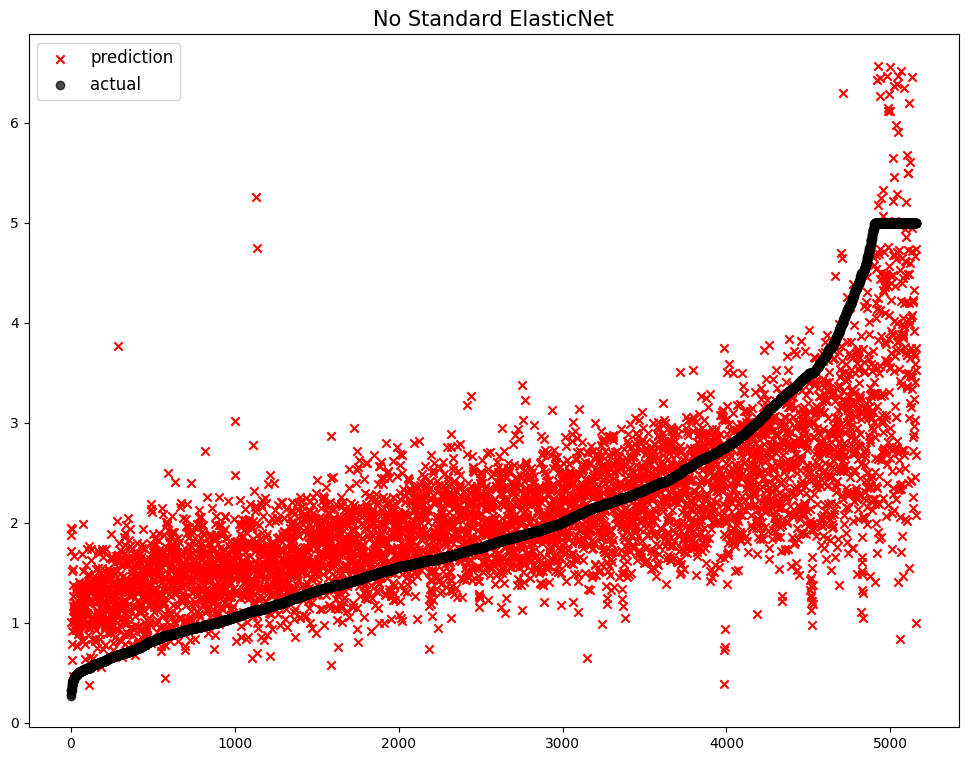

                       model       mse
0           Lasso(alpha=100)  1.337891
1            Lasso(alpha=10)  1.337414
2             Lasso(alpha=1)  0.955268
3   ElasticNet(l1_ratio=0.8)  0.707626
4   ElasticNet(l1_ratio=0.5)  0.685263
5   ElasticNet(l1_ratio=0.2)  0.642330
6           Lasso(alpha=0.1)  0.609989
7        Standard ElasticNet  0.597131
8     No Standard ElasticNet  0.597131
9          Lasso(alpha=0.01)  0.534557
10          Ridge(alpha=100)  0.529615
11        Lasso(alpha=0.001)  0.529007
12           Ridge(alpha=10)  0.528865
13       Lasso(alpha=0.0001)  0.528823
14            Ridge(alpha=1)  0.528812
15          Ridge(alpha=0.1)  0.528807
16         Ridge(alpha=0.01)  0.528807
17        Ridge(alpha=0.001)  0.528807
18       Ridge(alpha=0.0001)  0.528807
19          LinearRegression  0.528807


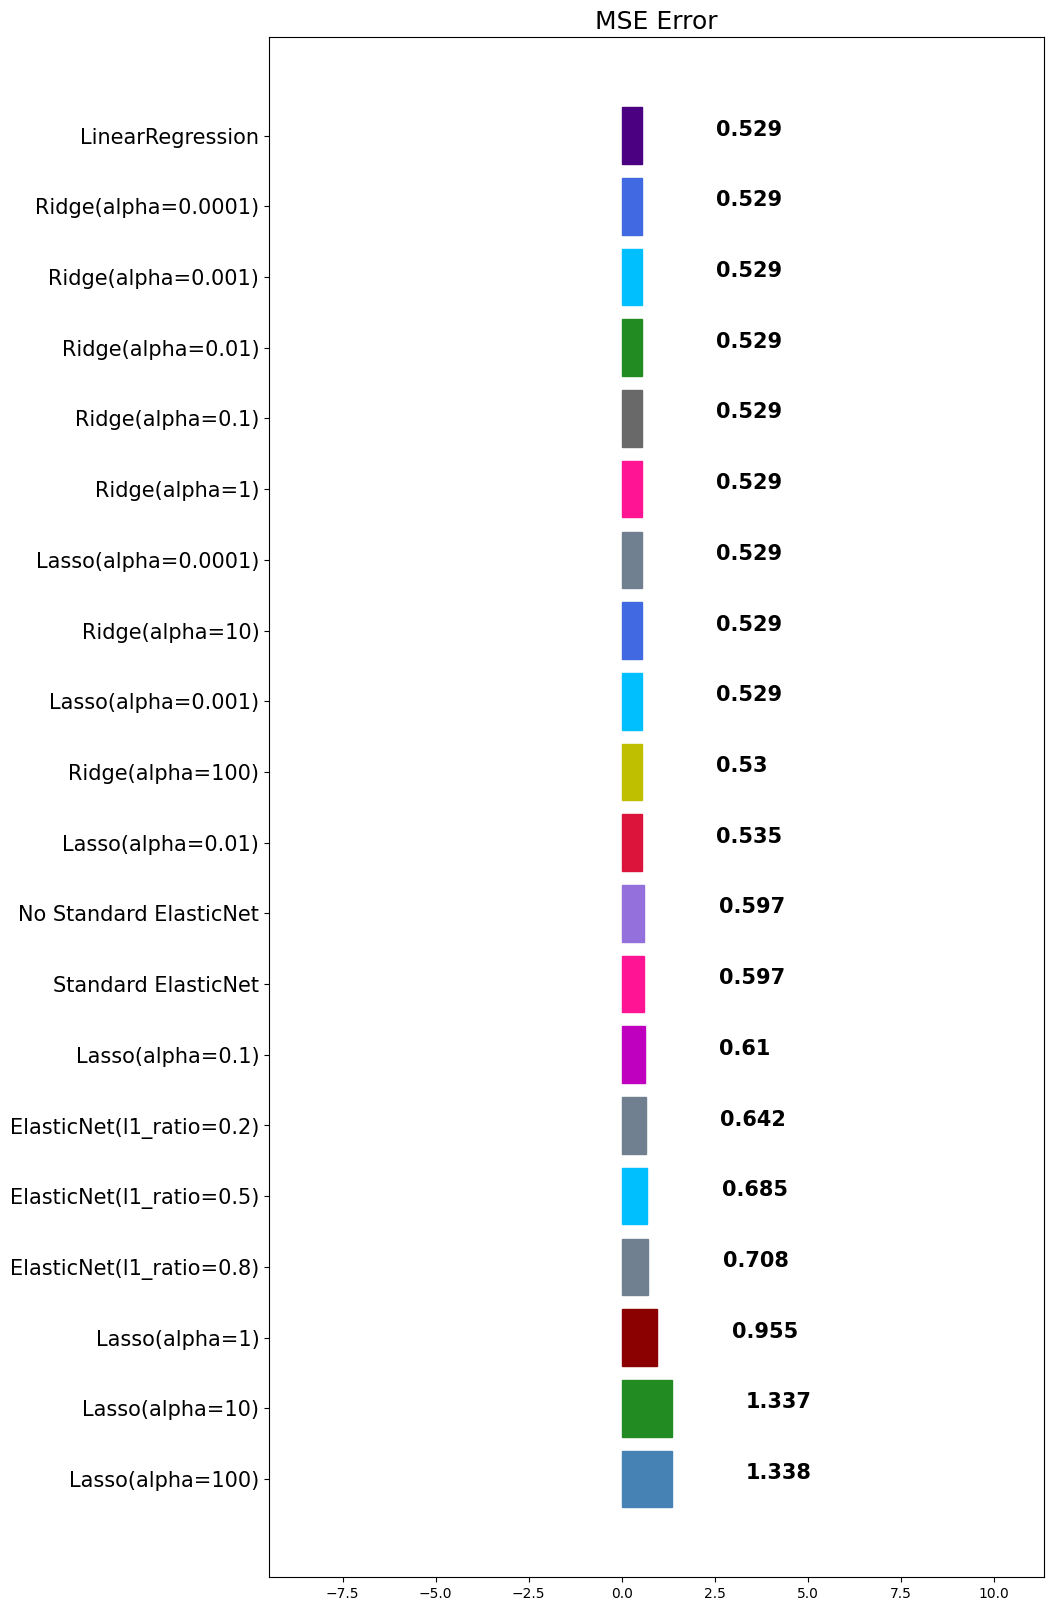

In [70]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### 다항 회귀
* 주어진 데이터가 단순한 직선보다 복잡한 형태라면 어떻게 할 것인가? 
* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다.
* 이렇게 하는 간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고,   
  이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.  
  이런 기법을 다항 회귀(polynominal regression)라고 한다.

**다항 회귀를 활용한 2차 방정식 풀이**

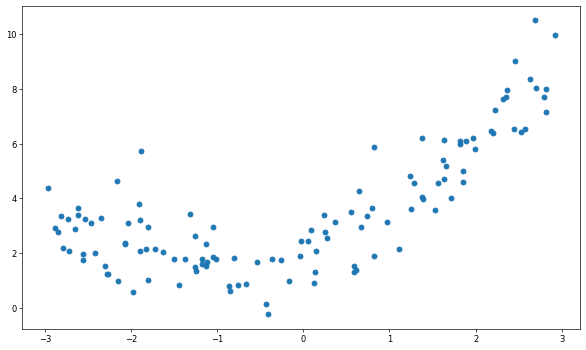

In [71]:
import numpy as np
import matplotlib.pyplot as plt

m = 120
np.random.seed(42)

# -3 ~ 3 범위의 실수값을 생성
# rand함수는 0~1사이의 실수값을 생성한다.
X = 6 * np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1) 
plt.figure(figsize=(12,7), dpi=60)
plt.scatter(X, y)

In [72]:
# 위의 데이터를 PolynominalFeatures를 사용해 훈련 데이터를 변환해보자.
# PolynomialFeatures의 degree 값이 다항의 차수를 정의한다. 
# degree=2이면 2차, 3이면 3차이다.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [73]:
# X_poly는 제곱의 특성값(Feature)을 추가로 갖는다. 
# X, X**2
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다.  
PolynominalFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.
예를 들면, 두 개의 특성 a,b가 있을 때 degree=3으로 PolynominalFeatures를 적용 하면 $$a^2, a^3, b^2, b^3 $$ 뿐만 아니라, $$ab,a^2b,ab^2$$ 도 특성으로 추가한다.

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07417096]), array([[0.89094457, 0.49503308, 0.01293085]]))

In [75]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

그림 저장: quadratic_predictions_plot


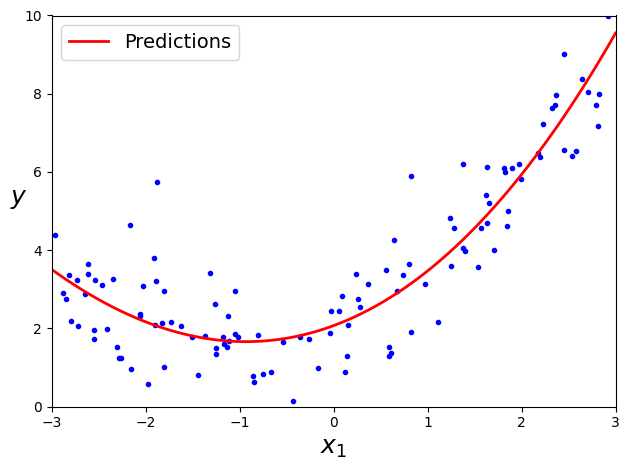

In [76]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [77]:
# 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.
# 300차 다항 회귀 모델과 선형 모델, 그리고 2차 모델과 비교해 보자

위의 그래프를 보면 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합(Overfitting) 되었다.    
반면에 선형 모델은 과소적합(Underfitting)되었다.  위의 그림에서 가장 일반화가  
잘된 모델은 2차 다항 회귀이다. 2차방정식으로 생성한 데이터이기 때문에 당연한   
결과지만 일반적으로 어떤 데이터가 생성됐는지 알 수 없다.   
훈련 데이터에서는 성능이 좋지만 검증 점수가 나쁘다면 모델이 과대적합된 것이고,  
양쪽 모두 좋지 않으면 과소적합이다. 


그림 저장: high_degree_polynomials_plot


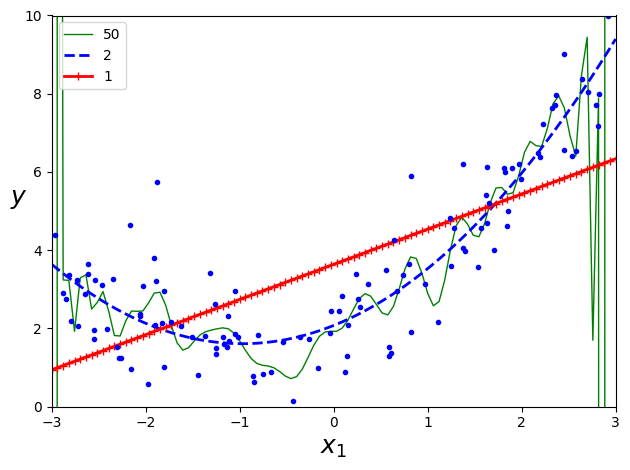

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [81]:
poly_features = poly.fit_transform(x_train)[0]

In [82]:
poly_features

array([      4.3636    ,      33.        ,       5.51020408,
             1.0148423 ,    1869.        ,       3.46753247,
            33.81      ,    -118.        ,      19.04100496,
           143.9988    ,      24.04432653,       4.42836586,
          8155.5684    ,      15.13092468,     147.533316  ,
          -514.9048    ,    1089.        ,     181.83673469,
            33.48979592,   61677.        ,     114.42857143,
          1115.73      ,   -3894.        ,      30.36234902,
             5.59198819,   10298.57142857,      19.10681156,
           186.3       ,    -650.20408163,       1.02990489,
          1896.74025974,       3.51899863,      34.31181818,
          -119.75139147, 3493161.        ,    6480.81818182,
         63190.89      , -220542.        ,      12.02378141,
           117.23727273,    -409.16883117,    1143.1161    ,
         -3989.58      ,   13924.        ])

In [83]:
x_train.iloc[0]

MedInc           4.363600
HouseAge        33.000000
AveRooms         5.510204
AveBedrms        1.014842
Population    1869.000000
AveOccup         3.467532
Latitude        33.810000
Longitude     -118.000000
Name: 11243, dtype: float64

In [84]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [85]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

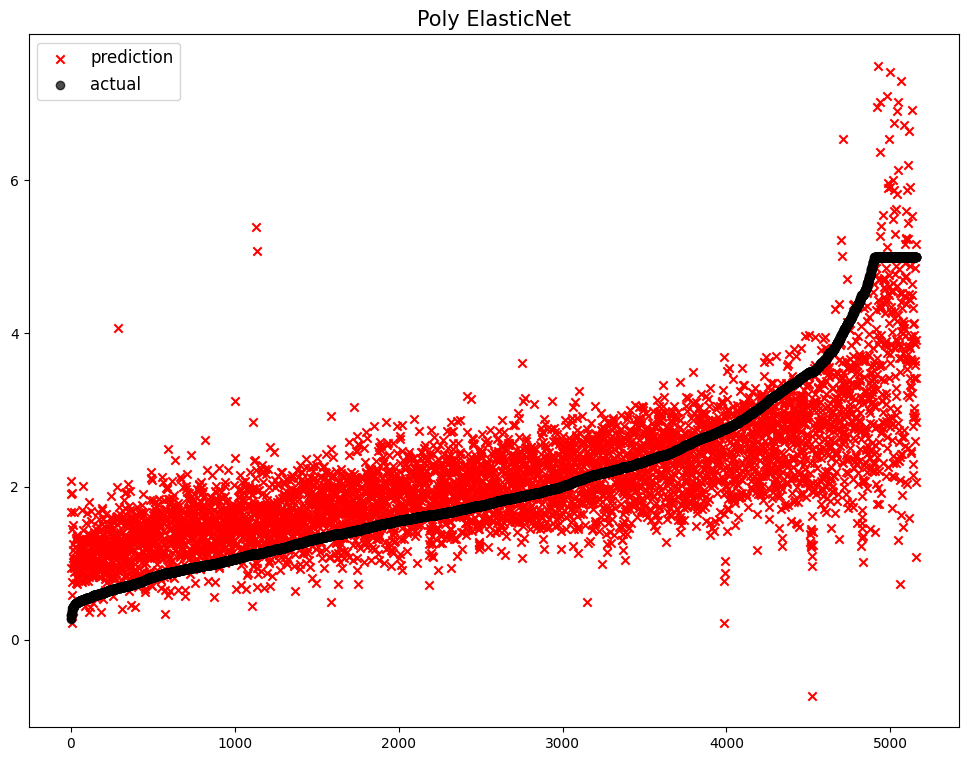

                       model       mse
0           Lasso(alpha=100)  1.337891
1            Lasso(alpha=10)  1.337414
2             Lasso(alpha=1)  0.955268
3   ElasticNet(l1_ratio=0.8)  0.707626
4   ElasticNet(l1_ratio=0.5)  0.685263
5   ElasticNet(l1_ratio=0.2)  0.642330
6           Lasso(alpha=0.1)  0.609989
7        Standard ElasticNet  0.597131
8     No Standard ElasticNet  0.597131
9            Poly ElasticNet  0.573933
10         Lasso(alpha=0.01)  0.534557
11          Ridge(alpha=100)  0.529615
12        Lasso(alpha=0.001)  0.529007
13           Ridge(alpha=10)  0.528865
14       Lasso(alpha=0.0001)  0.528823
15            Ridge(alpha=1)  0.528812
16          Ridge(alpha=0.1)  0.528807
17         Ridge(alpha=0.01)  0.528807
18        Ridge(alpha=0.001)  0.528807
19       Ridge(alpha=0.0001)  0.528807
20          LinearRegression  0.528807


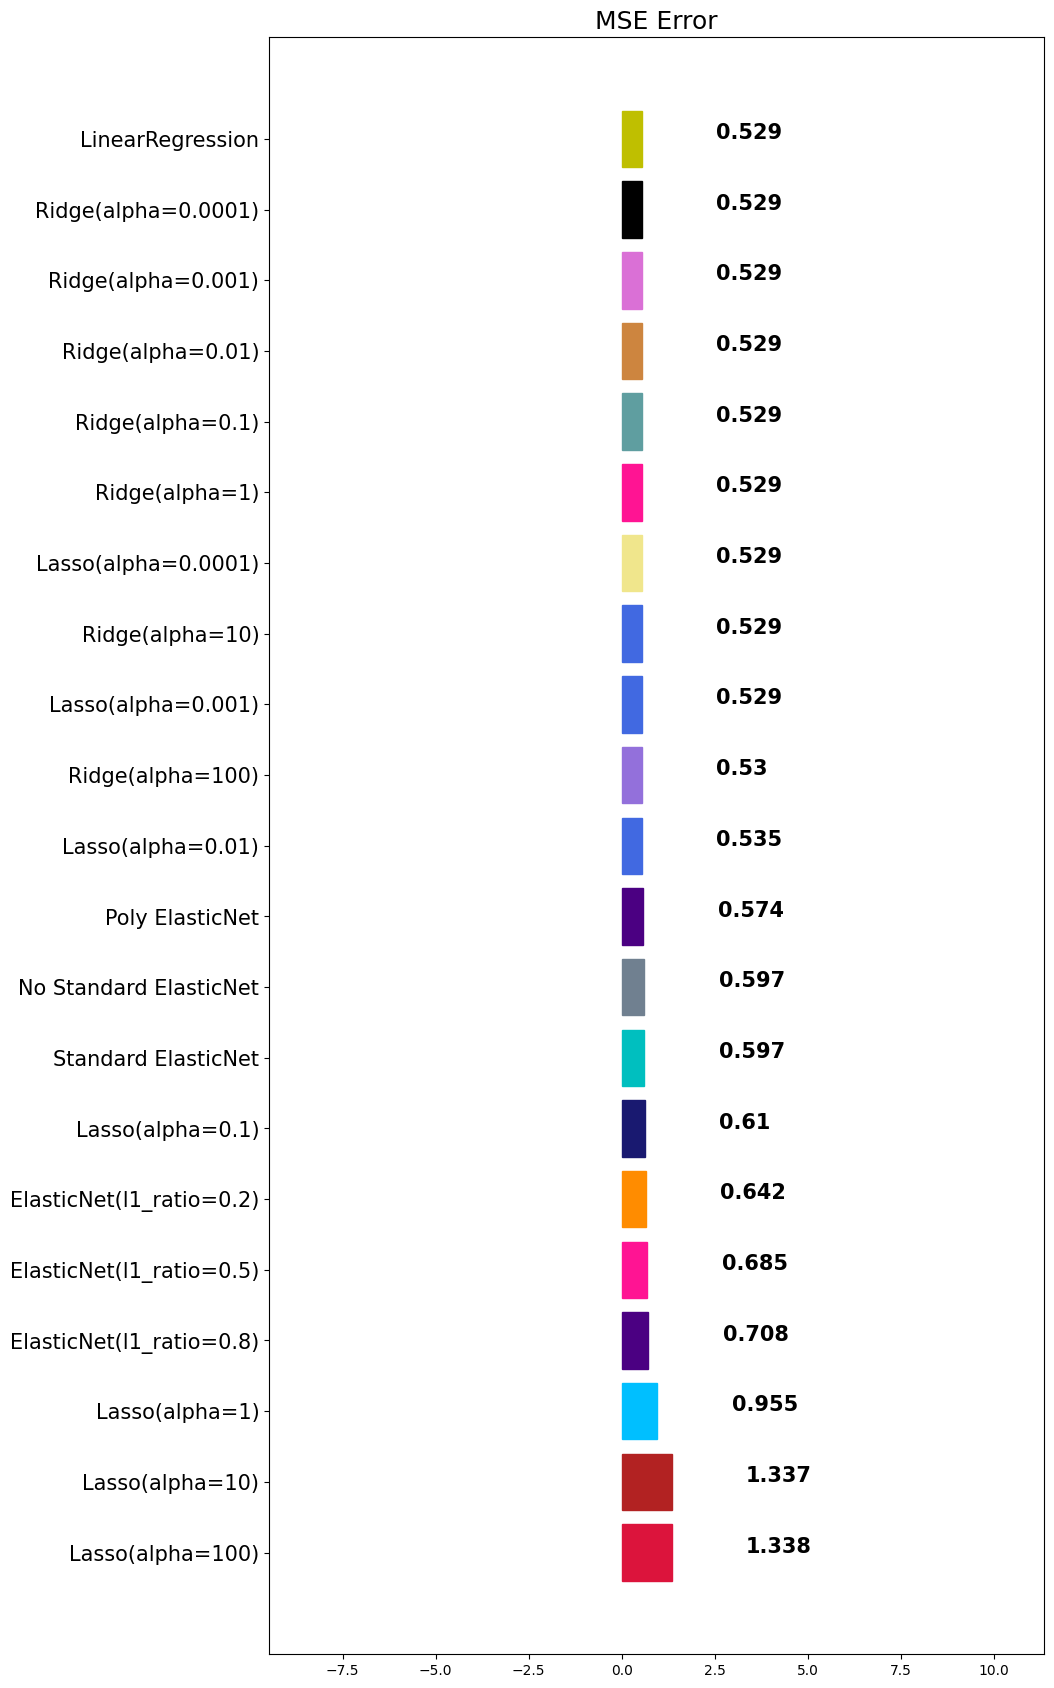

In [86]:
mse_eval('Poly ElasticNet', poly_pred, y_test)